# TASK 1 
**Requirements**
1. This is a regression problem. The task is to predict critical temperature in the superconductivity data.
2. Use a stratified sampling method to sample (around) 2/3 and 1/3 recordsin the file train.csv for training and test, respectively.
3. Main steps of the project should be (a) “discover and visualise the data”, (b) “prepare the data for machine learning algorithms”, (c) “select and train models”, (d) “fine-tune the models” and (e) “evaluate the outcomes”. You can structure the project in your own way. Some steps can be performed more than once.
4. In the steps (c) and (d), you can choose any regression algorithm.
5. Explanation of each step together with the Python codes must be included.
6. A comparison of the regression models’ performance must be included.

<div class="alert alert-info">
  <strong>Columns Description</strong>

<table>
  <tr>
    <th>Data Set Characteristics: </th>
    <th>Attribute Characteristics:</th>
    <th>Associated Tasks:</th>
    <th>Number of Instances:</th>
    <th>Number of Attributes:</th>
    <th>Missing Values?</th>
    <th>Area:</th>
    <th>Date Donated</th>
    <th>Number of Web Hits</th>
  </tr>
  <tr>
    <td>Multivariate</td>
    <td>Real</td>
    <td>Regression</td>
    <td>21263</td>
    <td>81</td>
    <td>N/A</td>
    <td>Physical</td>
    <td>2018-10-12</td>
    <td>68116</td>

  </tr>
</table>
<strong>Data Set Information:</strong>
<p>Nursery Database was derived from a hierarchical decision model originally developed to rank applications for nursery schools. It was used during several years in 1980's when there was excessive enrollment to these schools in Ljubljana, Slovenia, and the rejected applications frequently needed an objective explanation. The final decision depended on three subproblems: occupation of parents and child's nursery, family structure and financial standing, and social and health picture of the family. The model was developed within expert system shell for decision making DEX (M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.).

The hierarchical model ranks nursery-school applications according to the following concept structure:

NURSERY Evaluation of applications for nursery schools
. EMPLOY Employment of parents and child's nursery
. . parents Parents' occupation
. . has_nurs Child's nursery
. STRUCT_FINAN Family structure and financial standings
. . STRUCTURE Family structure
. . . form Form of the family
. . . children Number of children
. . housing Housing conditions
. . finance Financial standing of the family
. SOC_HEALTH Social and health picture of the family
. . social Social conditions
. . health Health conditions

Input attributes are printed in lowercase. Besides the target concept (NURSERY) the model includes four intermediate concepts: EMPLOY, STRUCT_FINAN, STRUCTURE, SOC_HEALTH. Every concept is in the original model related to its lower level descendants by a set of examples (for these examples sets see [Web Link]).

The Nursery Database contains examples with the structural information removed, i.e., directly relates NURSERY to the eight input attributes: parents, has_nurs, form, children, housing, finance, social, health.

Because of known underlying concept structure, this database may be particularly useful for testing constructive induction and structure discovery methods.</p>
<p>
<a href="https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data#" target="_blank"><strong>Link for dataset</strong></a>
    </p>
<br>
<strong>Objective</strong>
<p>The objective of this task is to develop an end-to-end data mining project by using the Python machine learning
library Scikit-Learn. (Note. Scikit-Learning is the only machine-learning library allowed to use in this task.
    However, other non-ML libraries (e.g., SciPy) can be used.)</p>
</div>

In [1]:
#Import all allowed libraries
import pandas as pd #for reading csv file, pre-processing, edit , etc.
from pandas.plotting import scatter_matrix #for scatter_matrix
import numpy as np #we will use numpy for function to split on test and training
%matplotlib inline 
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for plotting
import numpy as np #to calculate perfomace

from sklearn.model_selection import GridSearchCV #Fine Tune Model

#Skilit - learn libraries 
from sklearn.preprocessing import StandardScaler # standartiztion
from sklearn.model_selection import StratifiedShuffleSplit  # for splitting
from sklearn.model_selection import cross_val_score #for cross validation
#Regression Models
from sklearn.neighbors import KNeighborsRegressor # k-neigbors regression
from sklearn.tree import DecisionTreeRegressor #Desicion Tree
from sklearn.ensemble import RandomForestRegressor #Random Forest



pd.set_option('display.width', 1000) #set width
pd.set_option('display.max_columns', 100) #set max columns
pd.set_option('display.max_rows', 500) #set rows

In [2]:
#Read CSV file
data  = pd.read_csv('train.csv')

# DATA PREPROCESSING & VISUALIZATION

In [3]:
data.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  std_atomic_mass  wtd_std_atomic_mass  mean_fie  wtd_mean_fie   gmean_fie  wtd_gmean_fie  entropy_fie  wtd_entropy_fie  range_fie  wtd_range_fie     std_fie  wtd_std_fie  mean_atomic_radius  wtd_mean_atomic_radius  gmean_atomic_radius  wtd_gmean_atomic_radius  entropy_atomic_radius  wtd_entropy_atomic_radius  range_atomic_radius  wtd_range_atomic_radius  std_atomic_radius  wtd_std_atomic_radius  mean_Density  wtd_mean_Density  gmean_Density  wtd_gmean_Density  entropy_Density  wtd_entropy_Density  range_Density  wtd_range_Density  std_Density  wtd_std_Density  mean_ElectronAffinity  wtd_mean_ElectronAffinity  gmean_ElectronAffinity  wtd_gmean_ElectronAffinity  entropy_ElectronAffinity  wtd_entropy_ElectronAffinity  range_ElectronAffinity  wtd_range_ElectronAffinity  std_ElectronAffinity  \
0                   4         88.944468             57.862692          66.361592              36.116612             1.181795                 1.062396          122.90607              31.794921        51.968828            53.622535   775.425   1010.268571  718.152900     938.016780     1.305967         0.791488      810.6     735.985714  323.811808   355.562967              160.25              105.514286           136.126003                84.528423               1.259244                   1.207040                  205                42.914286          75.237540              69.235569    4654.35725       2961.502286     724.953211          53.543811         1.033129             0.814598       8958.571        1579.583429  3306.162897      3572.596624                81.8375                 111.727143               60.123179                   99.414682                  1.159687                      0.787382                  127.05                   80.987143             51.433712   
1                   5         92.729214             58.518416          73.132787              36.396602             1.449309                 1.057755          122.90607              36.161939        47.094633            53.979870   766.440   1010.612857  720.605511     938.745413     1.544145         0.807078      810.6     743.164286  290.183029   354.963511              161.20              104.971429           141.465215                84.370167               1.508328                   1.204115                  205                50.571429          67.321319              68.008817    5821.48580       3021.016571    1237.095080          54.095718         1.314442             0.914802      10488.571        1667.383429  3767.403176      3632.649185                90.8900                 112.316429               69.833315                  101.166398                  1.427997                      0.838666                  127.05                   81.207857             49.438167   
2                   4         88.944468             57.885242          66.361592              36.122509             1.181795                 0.975980          122.90607              35.741099        51.968828            53.656268   775.425   1010.820000  718.152900     939.009036     1.305967         0.773620      810.6     743.164286  323.811808   354.804183              160.25              104.685714           136.126003                84.214573               1.259244                   1.132547                  205                49.314286          75.237540              67.797712    4654.35725       2999.159429     724.953211          53.974022         1.033129             0.760305       8958.571        1667.383429  3306.162897      3592.019281                81.8375                 112.213571               60.123179                  101.082152                  1.159687                      0.786007                  127.05                   81.207857             51.433712   
3                   4         8

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [5]:
data.describe()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  std_atomic_mass  wtd_std_atomic_mass      mean_fie  wtd_mean_fie     gmean_fie  wtd_gmean_fie   entropy_fie  wtd_entropy_fie     range_fie  wtd_range_fie       std_fie   wtd_std_fie  mean_atomic_radius  wtd_mean_atomic_radius  gmean_atomic_radius  wtd_gmean_atomic_radius  entropy_atomic_radius  wtd_entropy_atomic_radius  range_atomic_radius  wtd_range_atomic_radius  std_atomic_radius  wtd_std_atomic_radius  mean_Density  wtd_mean_Density  gmean_Density  wtd_gmean_Density  entropy_Density  wtd_entropy_Density  range_Density  wtd_range_Density   std_Density  wtd_std_Density  mean_ElectronAffinity  wtd_mean_ElectronAffinity  gmean_ElectronAffinity  wtd_gmean_ElectronAffinity  entropy_ElectronAffinity  wtd_entropy_ElectronAffinity  range_ElectronAffinity  wtd_range_ElectronAffinity  \
count        21263.000000      21263.000000          21263.000000       21263.000000           21263.000000         21263.000000             21263.000000       21263.000000           21263.000000     21263.000000         21263.000000  21263.000000  21263.000000  21263.000000   21263.000000  21263.000000     21263.000000  21263.000000   21263.000000  21263.000000  21263.000000        21263.000000            21263.000000         21263.000000             21263.000000           21263.000000               21263.000000         21263.000000             21263.000000       21263.000000           21263.000000  21263.000000      21263.000000   21263.000000       21263.000000     21263.000000         21263.000000   21263.000000       21263.000000  21263.000000     21263.000000           21263.000000               21263.000000            21263.000000                21263.000000              21263.000000                  21263.000000            21263.000000                21263.000000   
mean             4.115224         87.557631             72.988310          71.290627              58.539916             1.165608                 1.063884         115.601251              33.225218        44.391893            41.448045    769.614748    870.442317    737.474751     832.769649      1.299172         0.926726    572.222612     483.517264    215.631279    224.050033          157.983101              134.720039           144.448738               120.989330               1.267756                   1.131138           139.325025                51.369885          51.601267              52.340465   6111.465214       5267.188547    3460.692235        3117.241110         1.072425             0.856037    8665.438818        2902.736814   3416.910784      3319.170628              76.879751                  92.717486               54.359502                   72.416225                  1.070250                      0.770757              120.730514                   59.332637   
std              1.439295         29.676497             33.490406          31.030272              36.651067             0.364930                 0.401423          54.626887              26.967752        20.035430            19.983544     87.488694    143.278200     78.327275     119.772520      0.381935         0.334018    309.614442     224.042874    109.966774    127.927104           20.147288               28.801567            22.090958                35.837843               0.375411                   0.407159            67.272228                35.019356          22.898396              25.294524   2846.785185       3221.314506    3703.256370        3975.122587         0.342356             0.319761    4097.126831        2398.471020   1673.624915      1611.799629              27.701890                  32.276387               29.007425                   31.648444                  0.343391                      0.285986               58.700327                   28.620409   
min              1.000000          6.941000        

In [6]:
#check for duplicates
print(data.shape)
print(data.duplicated().sum())

(21263, 82)
66


In [7]:
data[data.duplicated(keep=False)].head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  std_atomic_mass  wtd_std_atomic_mass  mean_fie  wtd_mean_fie   gmean_fie  wtd_gmean_fie  entropy_fie  wtd_entropy_fie  range_fie  wtd_range_fie     std_fie  wtd_std_fie  mean_atomic_radius  wtd_mean_atomic_radius  gmean_atomic_radius  wtd_gmean_atomic_radius  entropy_atomic_radius  wtd_entropy_atomic_radius  range_atomic_radius  wtd_range_atomic_radius  std_atomic_radius  wtd_std_atomic_radius  mean_Density  wtd_mean_Density  gmean_Density  wtd_gmean_Density  entropy_Density  wtd_entropy_Density  range_Density  wtd_range_Density  std_Density  wtd_std_Density  mean_ElectronAffinity  wtd_mean_ElectronAffinity  gmean_ElectronAffinity  wtd_gmean_ElectronAffinity  entropy_ElectronAffinity  wtd_entropy_ElectronAffinity  range_ElectronAffinity  wtd_range_ElectronAffinity  std_ElectronAffinity  \
360                     4         76.444563             51.381751          59.356672              35.040763             1.199541                 1.291294           121.3276              14.343486        43.823354            44.222949     794.0   1002.428185  741.629349     936.340557     1.315004         0.893243      810.6     657.192664  311.743492   342.514887               164.5              114.795367           139.000514                89.901910               1.256701                   1.339498                  205                22.702703          77.525802              79.280065    4235.85725       2963.855718     669.556588          67.332544         1.015407             0.812784       8958.571        2074.908761  3194.938946      3641.516198                77.2375                 109.040541               53.527965                   86.372893                  1.105182                      0.764825                  127.05                   74.090734             54.830755   
8503                    4         76.444563             51.381751          59.356672              35.040763             1.199541                 1.291294           121.3276              14.343486        43.823354            44.222949     794.0   1002.428185  741.629349     936.340557     1.315004         0.893243      810.6     657.192664  311.743492   342.514887               164.5              114.795367           139.000514                89.901910               1.256701                   1.339498                  205                22.702703          77.525802              79.280065    4235.85725       2963.855718     669.556588          67.332544         1.015407             0.812784       8958.571        2074.908761  3194.938946      3641.516198                77.2375                 109.040541               53.527965                   86.372893                  1.105182                      0.764825                  127.05                   74.090734             54.830755   
10567                   2         60.332250             54.791708          59.596931              54.326799             0.680984                 0.573959            18.7815              26.205278         9.390750             7.582122     614.4    635.463000  613.361940     634.778481     0.691458         0.481385       71.4     398.196000   35.700000    28.824296               153.5              163.825000           152.499180               163.157628               0.686634                   0.456174                   35               108.065000          17.500000              14.129557    6007.00000       6067.770000    6006.116882        6067.192349         0.693000             0.499663        206.000        3647.130000   103.000000        83.162534                41.2500                  47.651500               39.797487                   46.652516                  0.658144                      0.387872                   21.70                   35.187500             10.850000   
10568              

In [8]:
#Drop duplicates
data = data.drop_duplicates()

In [9]:
#check for duplicates
print(data.shape)
print(data.duplicated().sum())

(21197, 82)
0


**Conclusion**
1. It looks that type of the each column is correct
2. 66 duplicates found in dataset
**What has been done**
1. Duplicates were removed

## HISTOGRAM & Correlation

### Histogram

<Figure size 1080x1080 with 0 Axes>

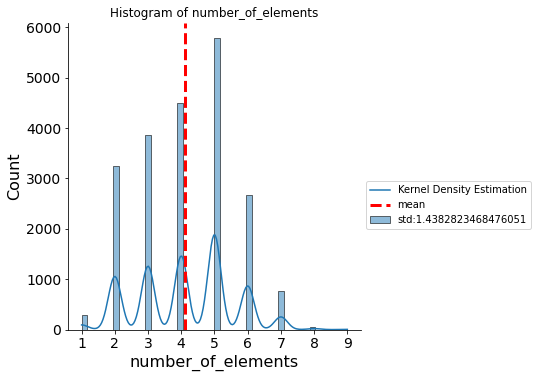

<Figure size 1080x1080 with 0 Axes>

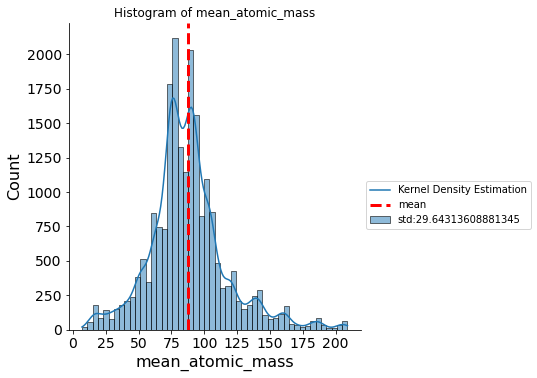

<Figure size 1080x1080 with 0 Axes>

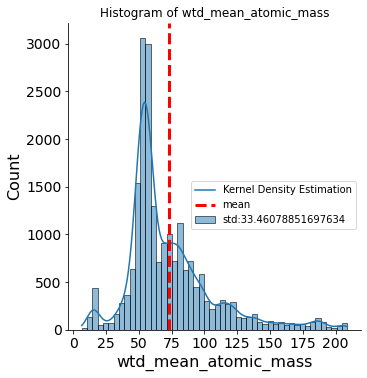

<Figure size 1080x1080 with 0 Axes>

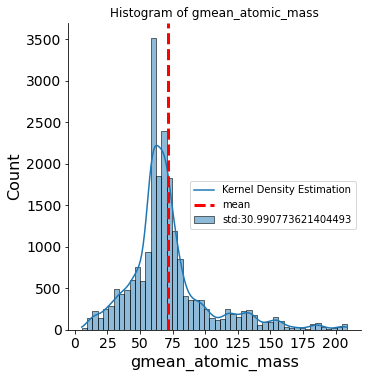

<Figure size 1080x1080 with 0 Axes>

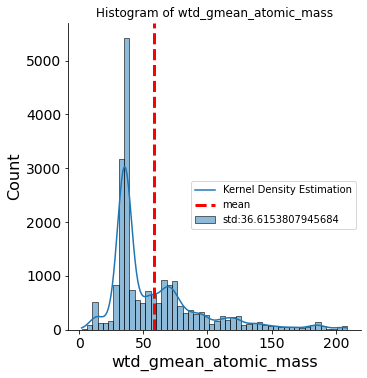

<Figure size 1080x1080 with 0 Axes>

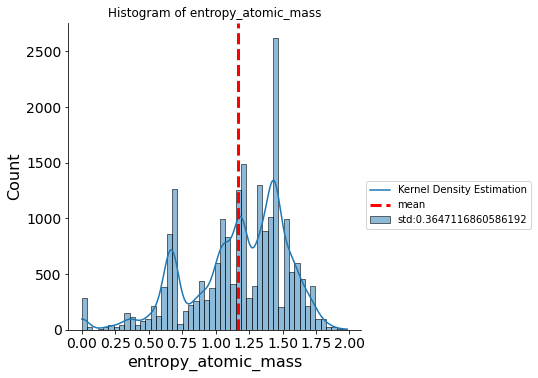

<Figure size 1080x1080 with 0 Axes>

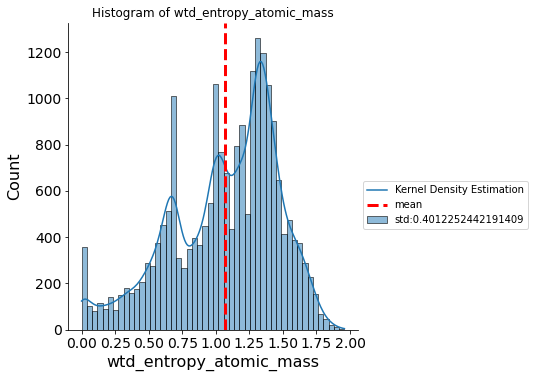

<Figure size 1080x1080 with 0 Axes>

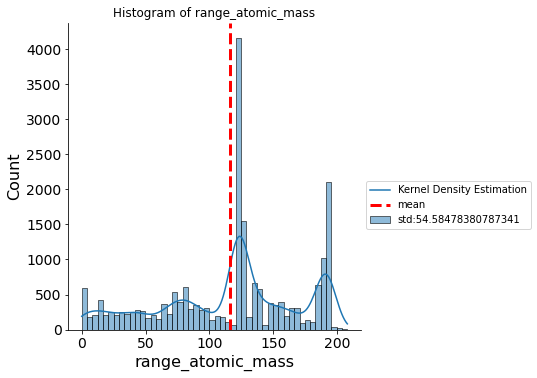

<Figure size 1080x1080 with 0 Axes>

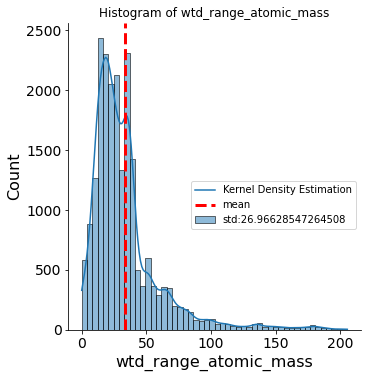

<Figure size 1080x1080 with 0 Axes>

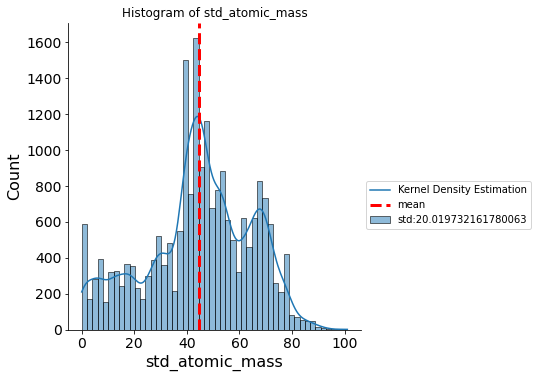

<Figure size 1080x1080 with 0 Axes>

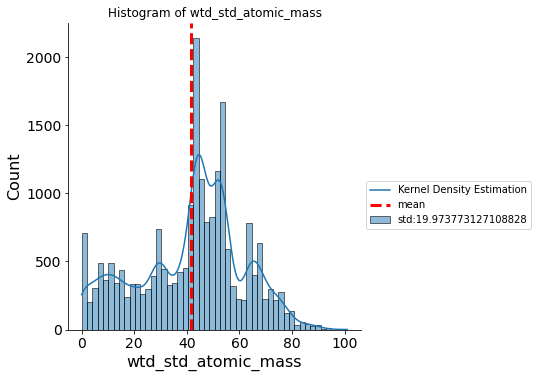

<Figure size 1080x1080 with 0 Axes>

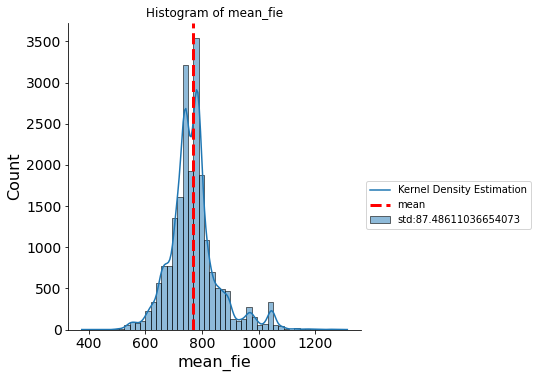

<Figure size 1080x1080 with 0 Axes>

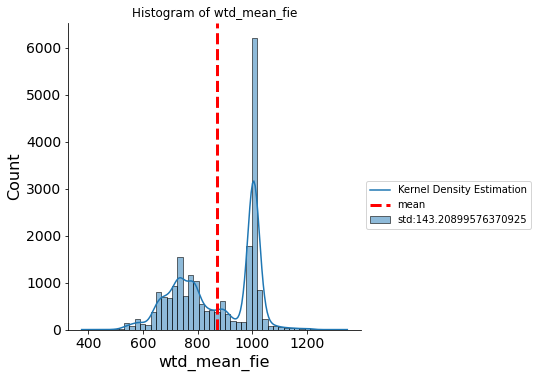

<Figure size 1080x1080 with 0 Axes>

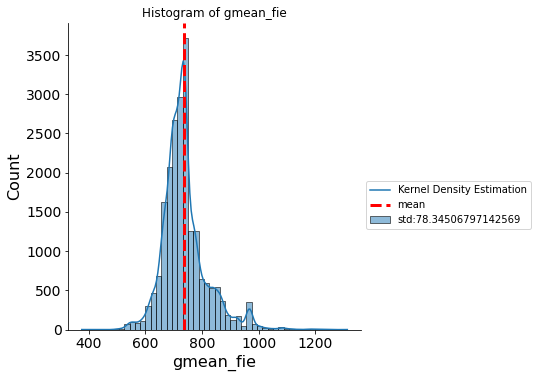

<Figure size 1080x1080 with 0 Axes>

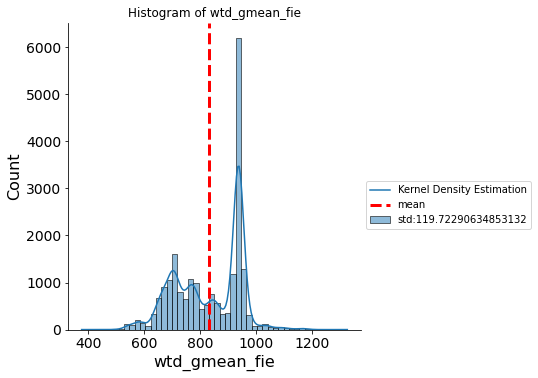

<Figure size 1080x1080 with 0 Axes>

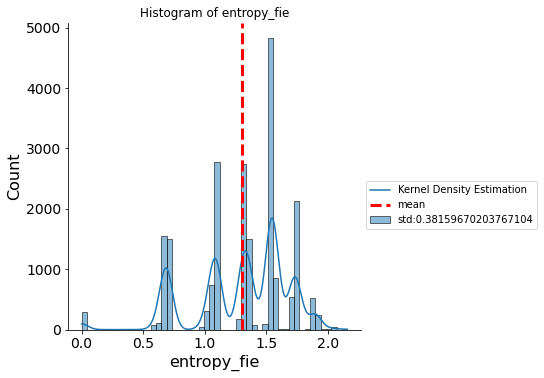

<Figure size 1080x1080 with 0 Axes>

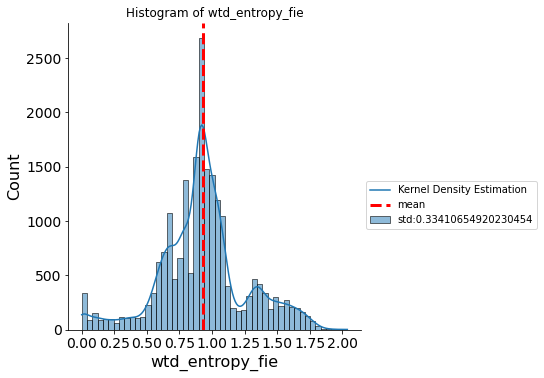

<Figure size 1080x1080 with 0 Axes>

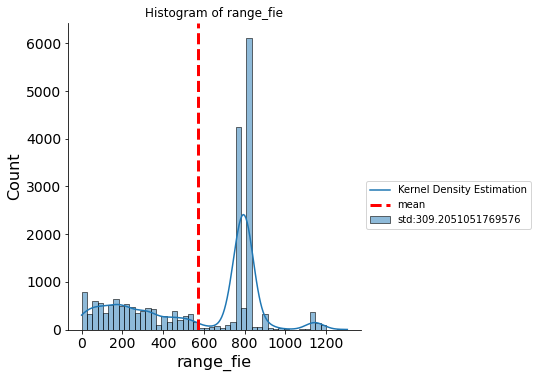

<Figure size 1080x1080 with 0 Axes>

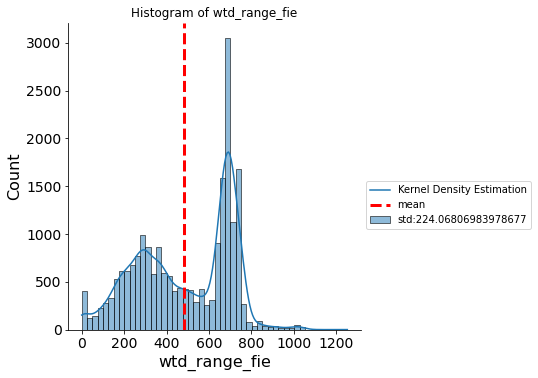

<Figure size 1080x1080 with 0 Axes>

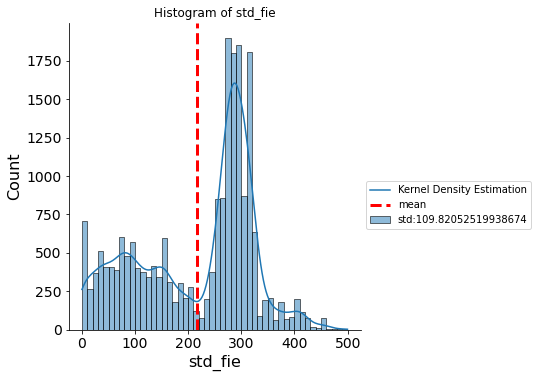

<Figure size 1080x1080 with 0 Axes>

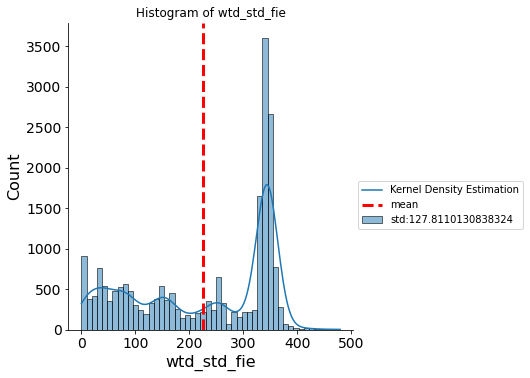

<Figure size 1080x1080 with 0 Axes>

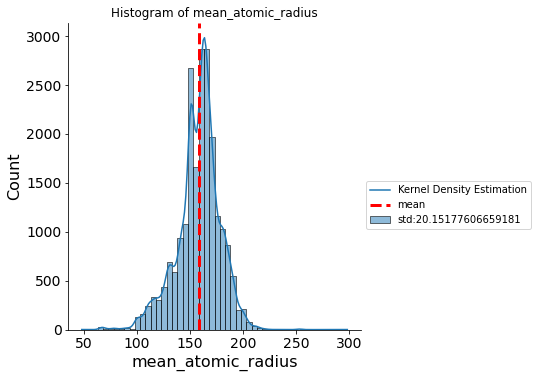

<Figure size 1080x1080 with 0 Axes>

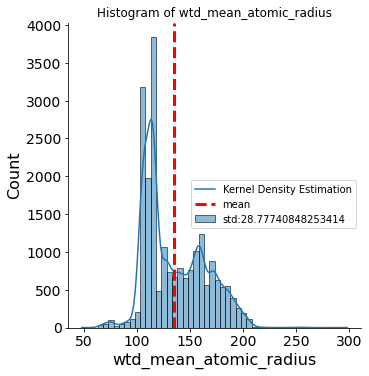

<Figure size 1080x1080 with 0 Axes>

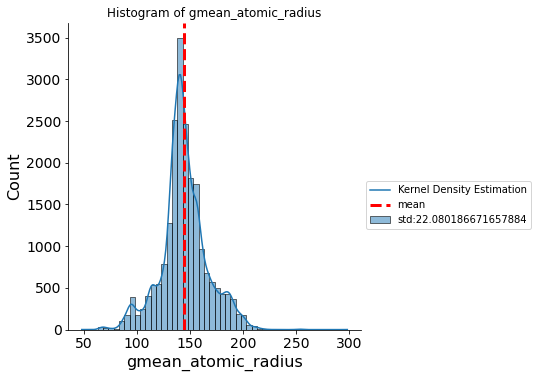

<Figure size 1080x1080 with 0 Axes>

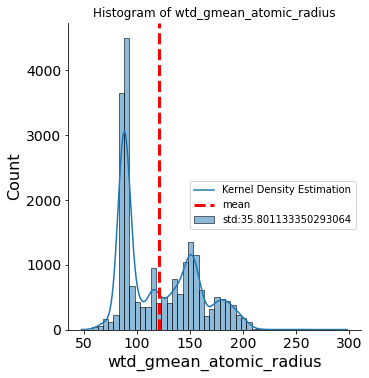

<Figure size 1080x1080 with 0 Axes>

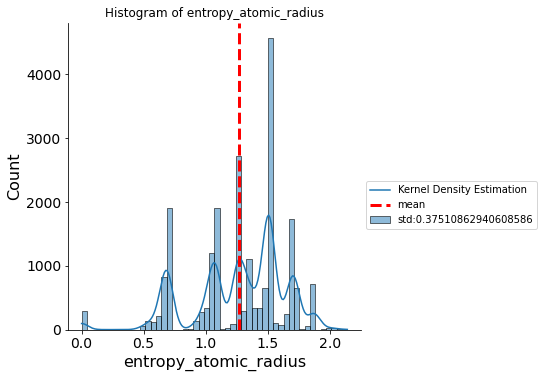

<Figure size 1080x1080 with 0 Axes>

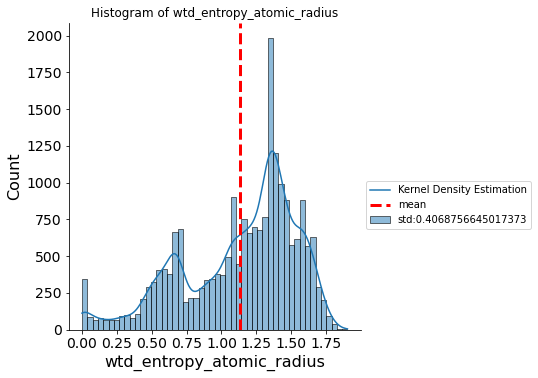

<Figure size 1080x1080 with 0 Axes>

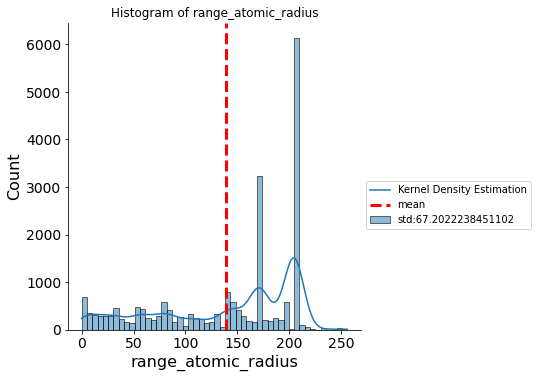

<Figure size 1080x1080 with 0 Axes>

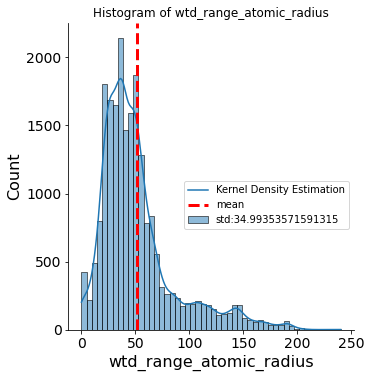

<Figure size 1080x1080 with 0 Axes>

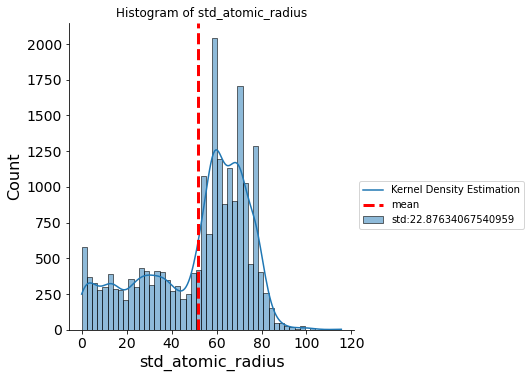

<Figure size 1080x1080 with 0 Axes>

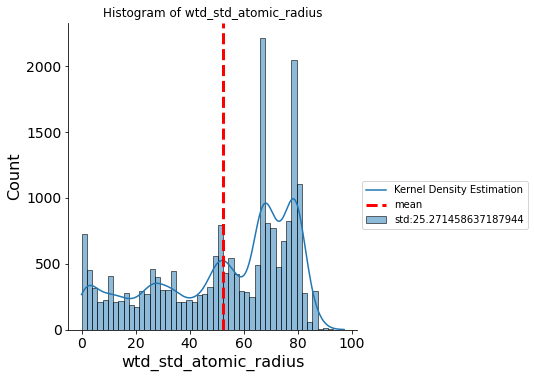

<Figure size 1080x1080 with 0 Axes>

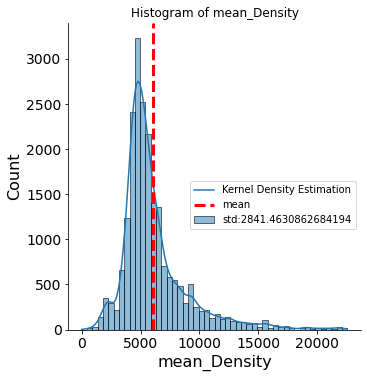

<Figure size 1080x1080 with 0 Axes>

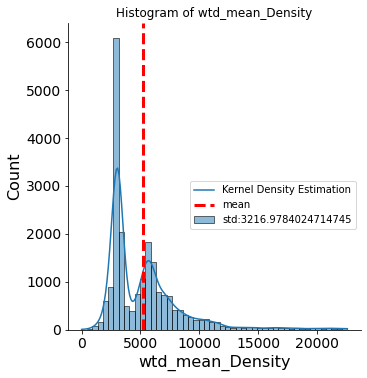

<Figure size 1080x1080 with 0 Axes>

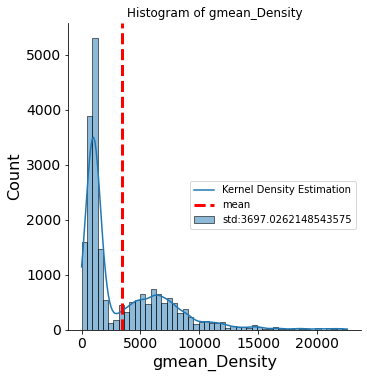

<Figure size 1080x1080 with 0 Axes>

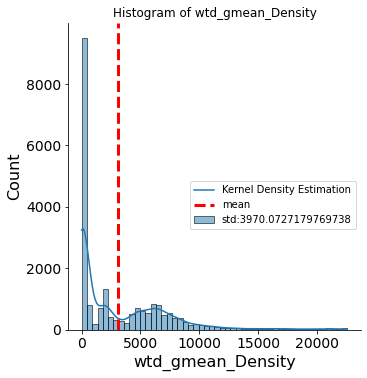

<Figure size 1080x1080 with 0 Axes>

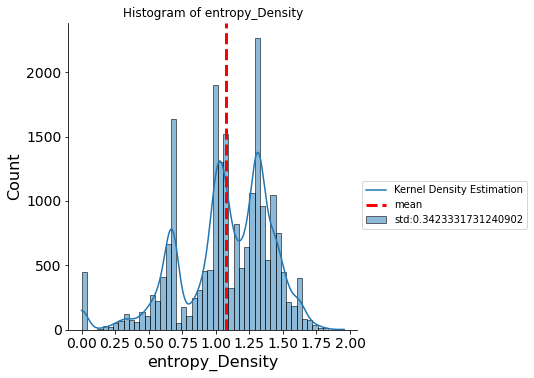

<Figure size 1080x1080 with 0 Axes>

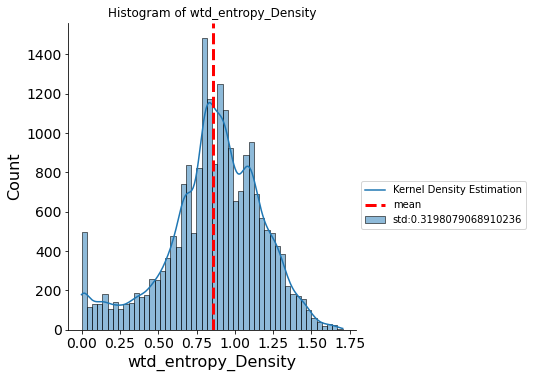

<Figure size 1080x1080 with 0 Axes>

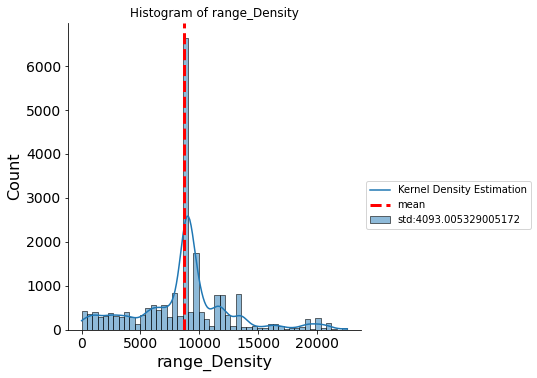

<Figure size 1080x1080 with 0 Axes>

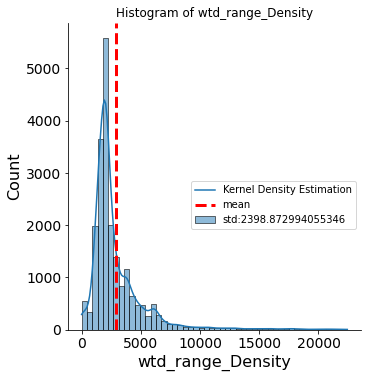

<Figure size 1080x1080 with 0 Axes>

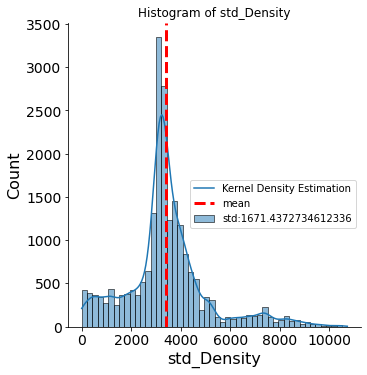

<Figure size 1080x1080 with 0 Axes>

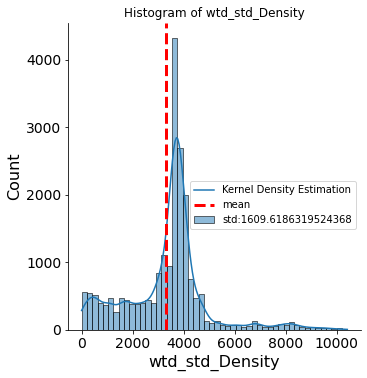

<Figure size 1080x1080 with 0 Axes>

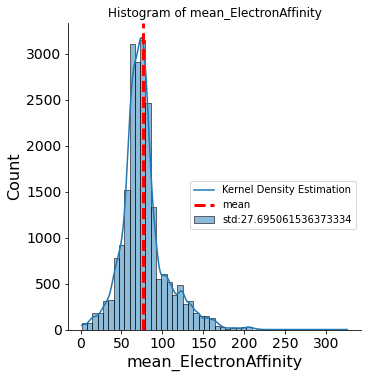

<Figure size 1080x1080 with 0 Axes>

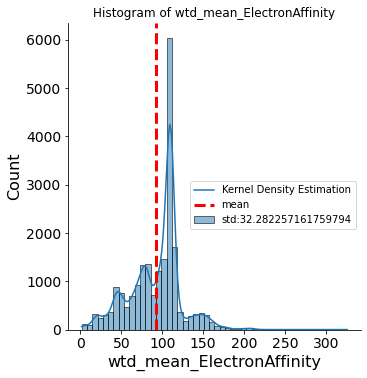

<Figure size 1080x1080 with 0 Axes>

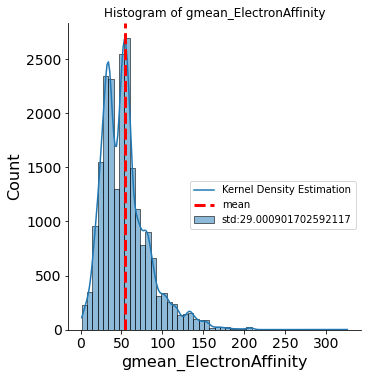

<Figure size 1080x1080 with 0 Axes>

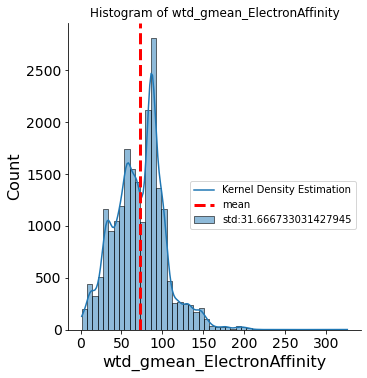

<Figure size 1080x1080 with 0 Axes>

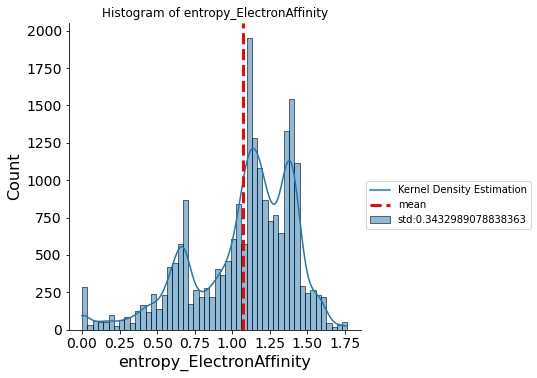

<Figure size 1080x1080 with 0 Axes>

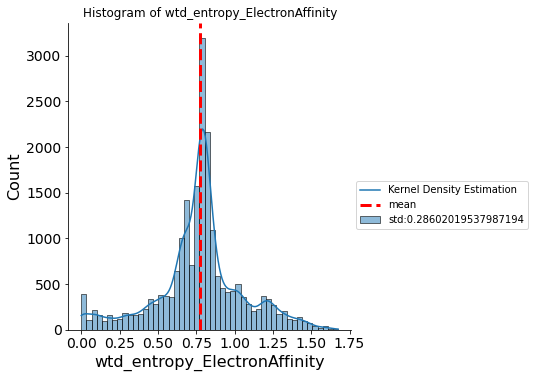

<Figure size 1080x1080 with 0 Axes>

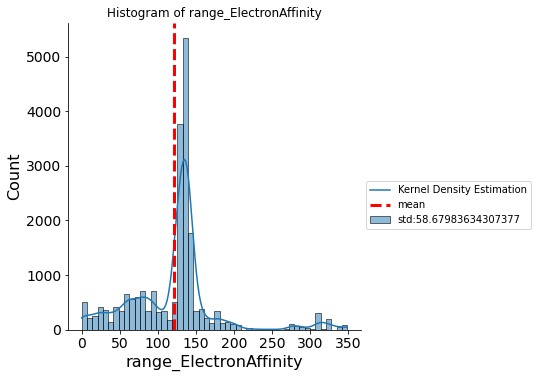

<Figure size 1080x1080 with 0 Axes>

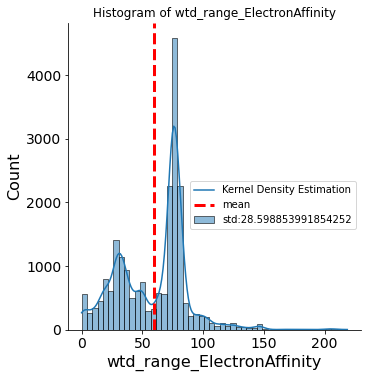

<Figure size 1080x1080 with 0 Axes>

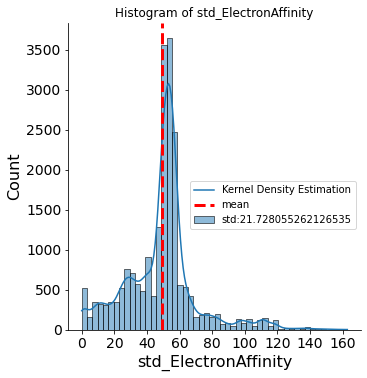

<Figure size 1080x1080 with 0 Axes>

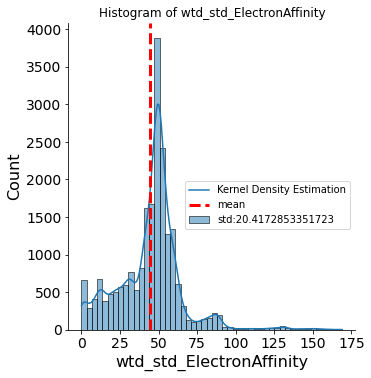

<Figure size 1080x1080 with 0 Axes>

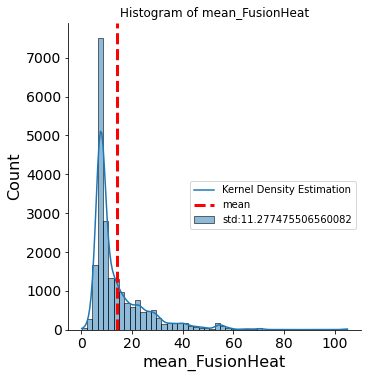

<Figure size 1080x1080 with 0 Axes>

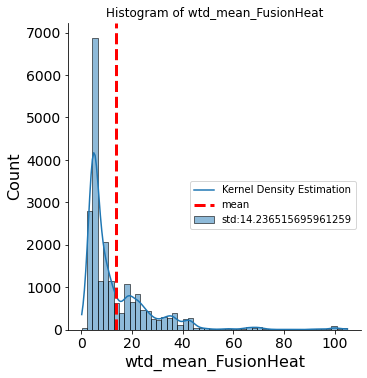

<Figure size 1080x1080 with 0 Axes>

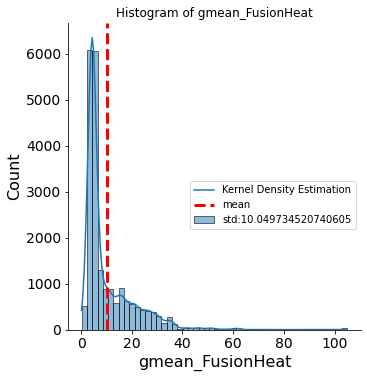

<Figure size 1080x1080 with 0 Axes>

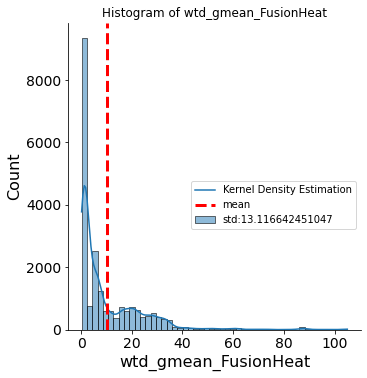

<Figure size 1080x1080 with 0 Axes>

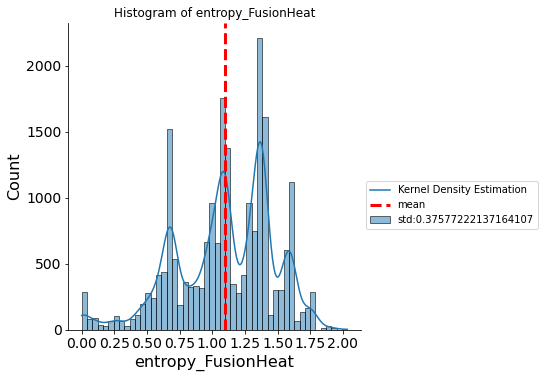

<Figure size 1080x1080 with 0 Axes>

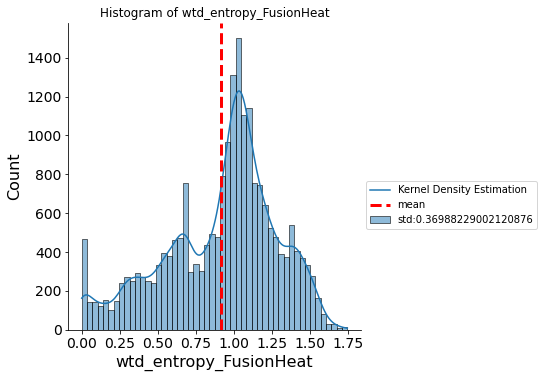

<Figure size 1080x1080 with 0 Axes>

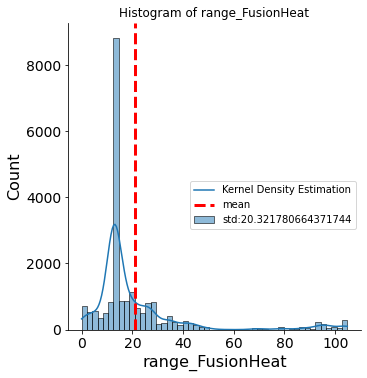

<Figure size 1080x1080 with 0 Axes>

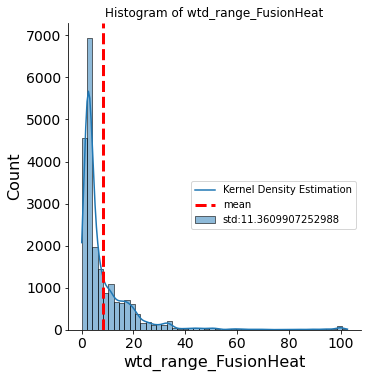

<Figure size 1080x1080 with 0 Axes>

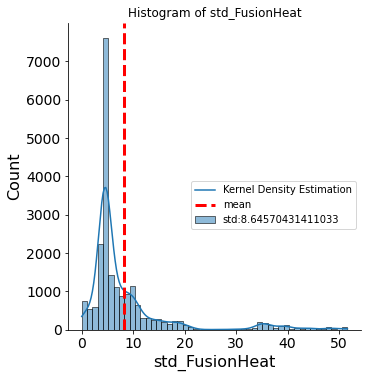

<Figure size 1080x1080 with 0 Axes>

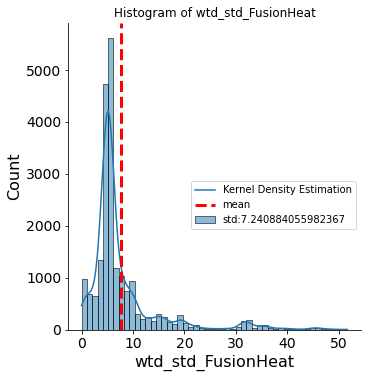

<Figure size 1080x1080 with 0 Axes>

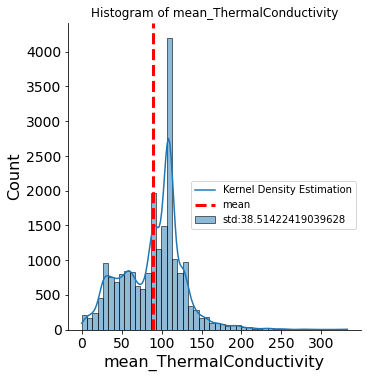

<Figure size 1080x1080 with 0 Axes>

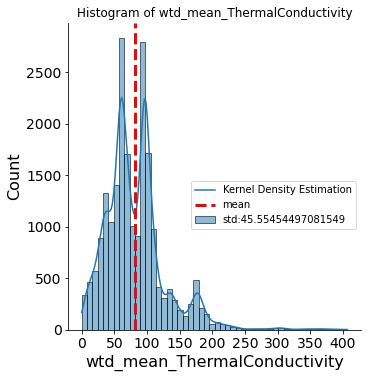

<Figure size 1080x1080 with 0 Axes>

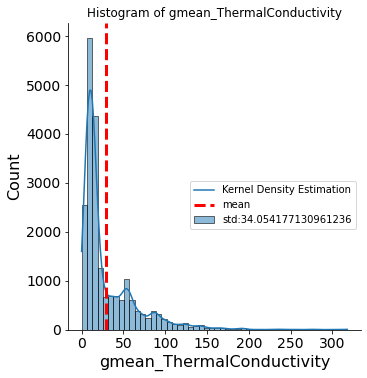

<Figure size 1080x1080 with 0 Axes>

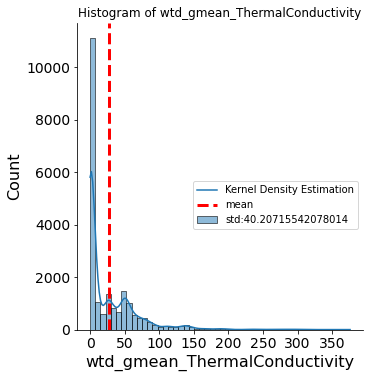

<Figure size 1080x1080 with 0 Axes>

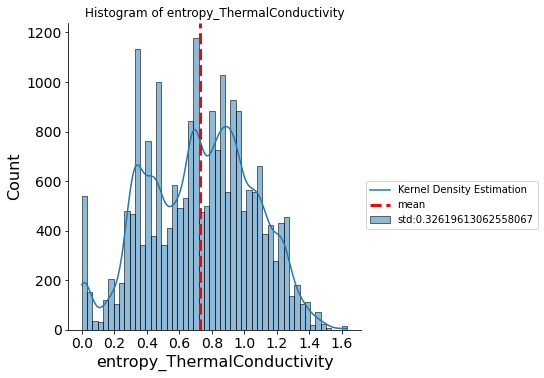

<Figure size 1080x1080 with 0 Axes>

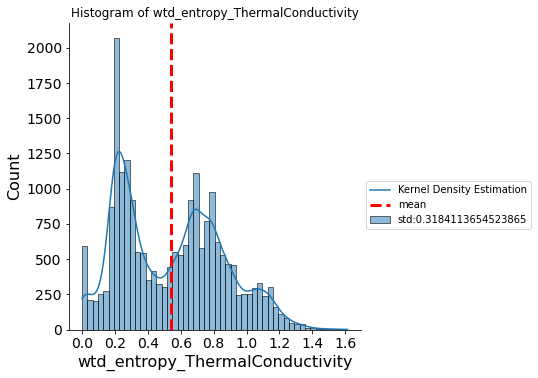

<Figure size 1080x1080 with 0 Axes>

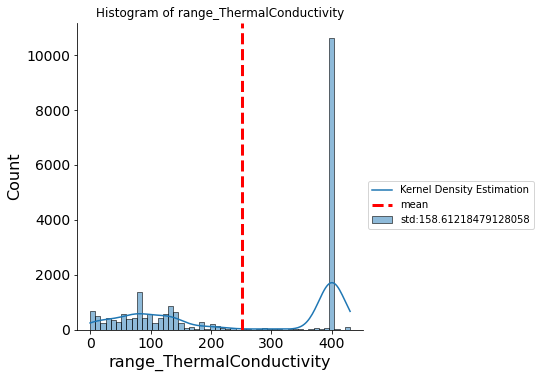

<Figure size 1080x1080 with 0 Axes>

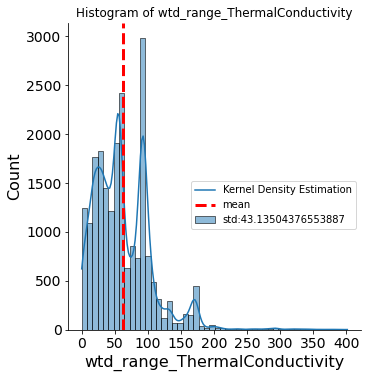

<Figure size 1080x1080 with 0 Axes>

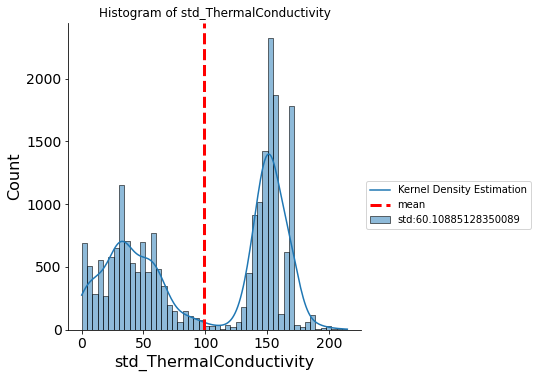

<Figure size 1080x1080 with 0 Axes>

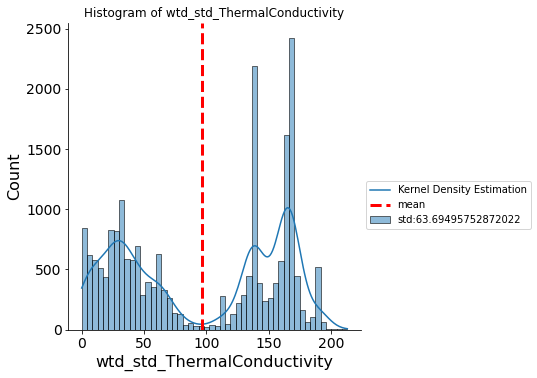

<Figure size 1080x1080 with 0 Axes>

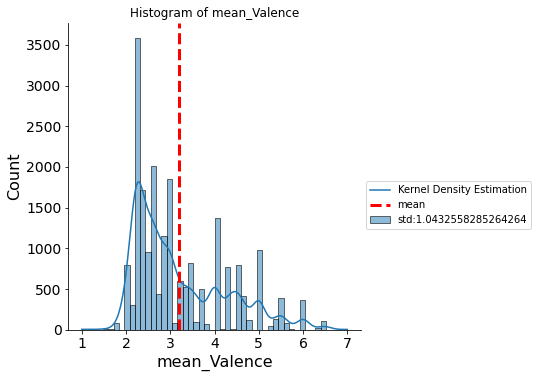

<Figure size 1080x1080 with 0 Axes>

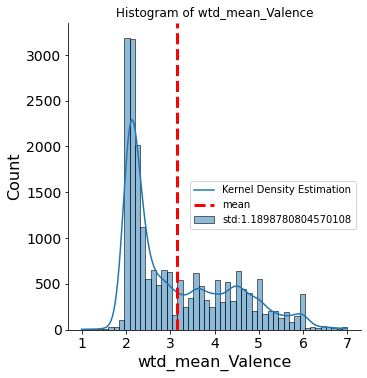

<Figure size 1080x1080 with 0 Axes>

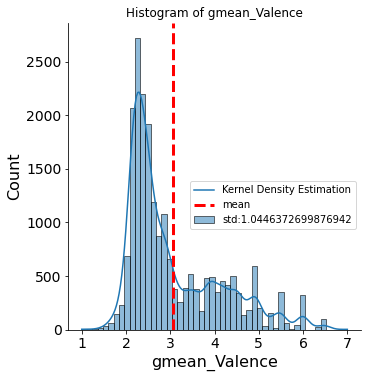

<Figure size 1080x1080 with 0 Axes>

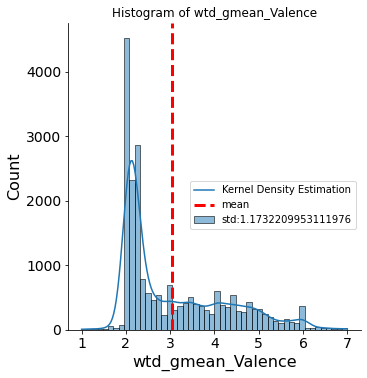

<Figure size 1080x1080 with 0 Axes>

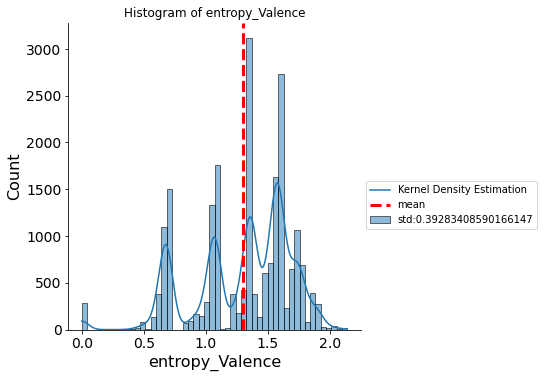

<Figure size 1080x1080 with 0 Axes>

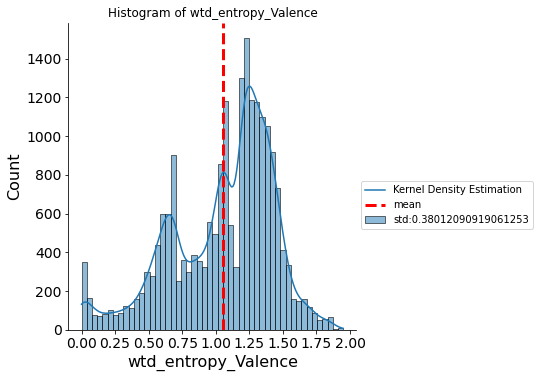

<Figure size 1080x1080 with 0 Axes>

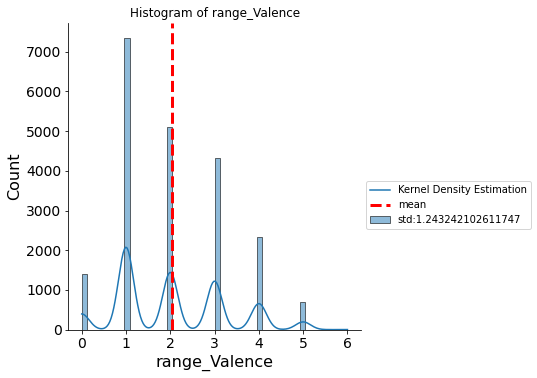

<Figure size 1080x1080 with 0 Axes>

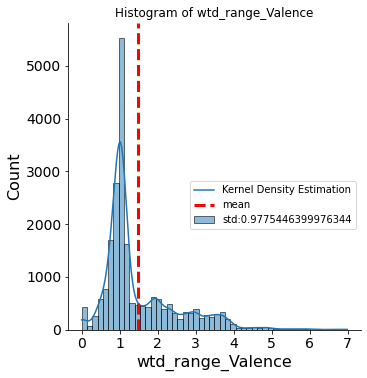

<Figure size 1080x1080 with 0 Axes>

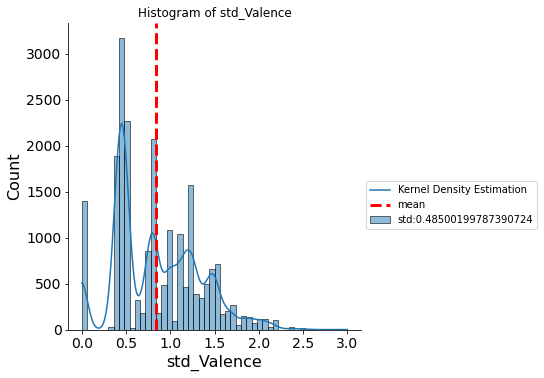

<Figure size 1080x1080 with 0 Axes>

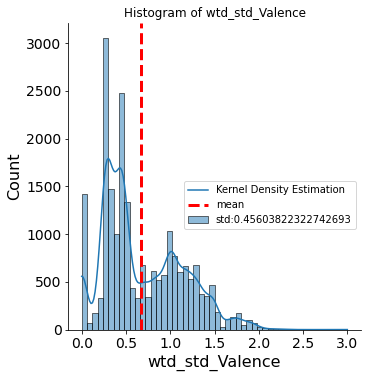

<Figure size 1080x1080 with 0 Axes>

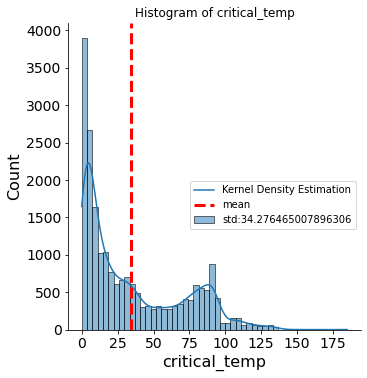

In [10]:
for i in data.columns:
    plt.figure(figsize=(15,15))
    
    sns.displot(data[i], kde=True, bins=50,kind='hist')
    #add mean
    plt.axvline(x=data[i].mean(),linewidth=3,label="mean",
            color='red',
            ls='--')
    #add ylabel
    plt.ylabel("Count", fontsize=16) 
    #add xlabel
    plt.xlabel(i, fontsize=16)
    #font size of ticks
    plt.xticks(fontsize=14) 
    plt.yticks(fontsize=14)
    #legend
    plt.legend(["Kernel Density Estimation","mean",f"std:{data[i].std()}"],bbox_to_anchor=(1, 0.5))
    #title
    plt.title(f"Histogram of {i}")
    plt.show()

### Correlation

In [11]:
data_correlation = data.corr()

In [12]:
data_correlation['critical_temp'].sort_values(ascending=False)[1:]

wtd_std_ThermalConductivity        0.720960
range_ThermalConductivity          0.687282
range_atomic_radius                0.653394
std_ThermalConductivity            0.653232
wtd_entropy_atomic_mass            0.626536
wtd_entropy_atomic_radius          0.602986
number_of_elements                 0.600394
range_fie                          0.600179
wtd_std_atomic_radius              0.598972
entropy_Valence                    0.598024
wtd_entropy_Valence                0.589204
wtd_std_fie                        0.581442
entropy_fie                        0.567156
wtd_entropy_FusionHeat             0.562808
std_atomic_radius                  0.559132
entropy_atomic_radius              0.558249
entropy_FusionHeat                 0.552069
entropy_atomic_mass                0.542894
std_fie                            0.541091
range_atomic_mass                  0.491642
wtd_range_ThermalConductivity      0.469053
entropy_Density                    0.456492
entropy_ElectronAffinity        

### Ploting Scatter plot to see corraltion to 'critical_temp'

/Users/yury/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


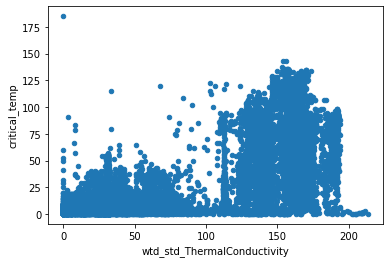

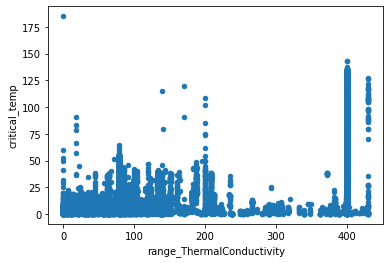

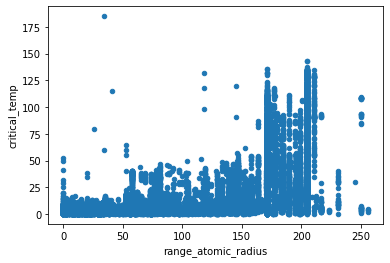

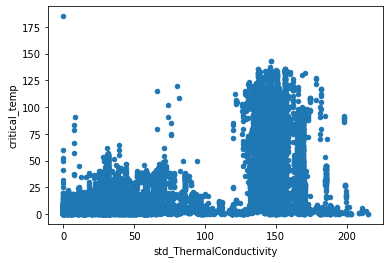

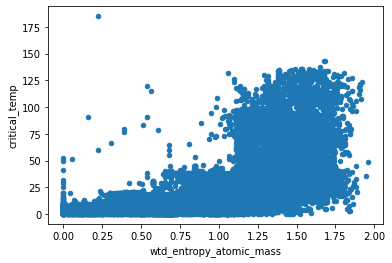

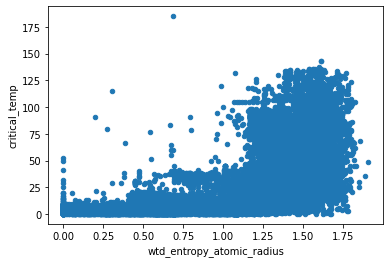

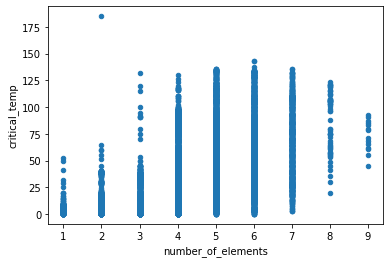

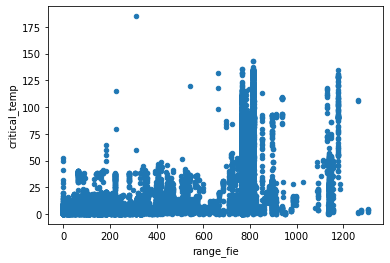

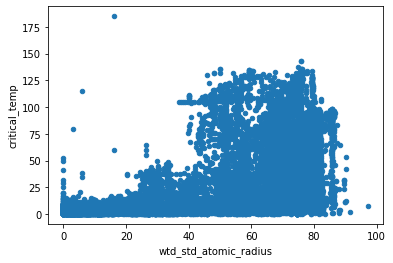

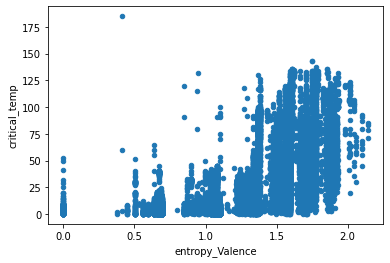

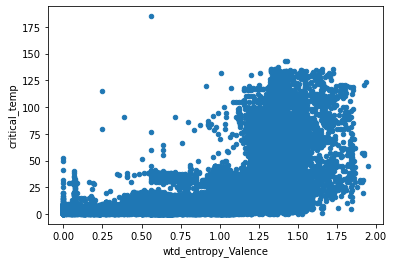

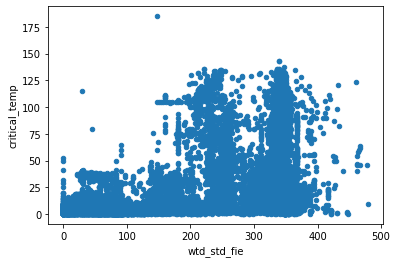

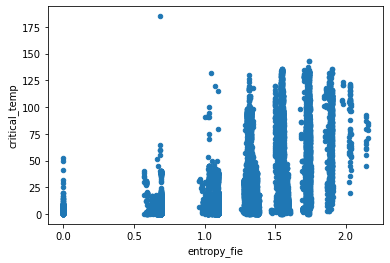

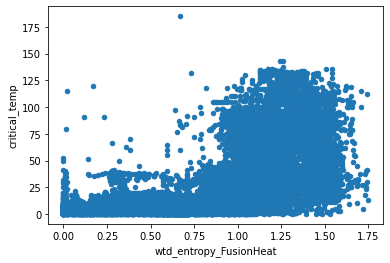

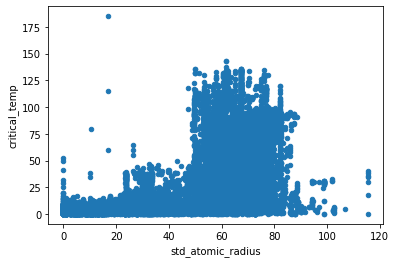

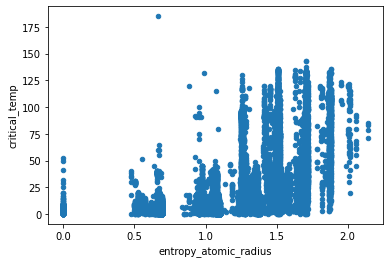

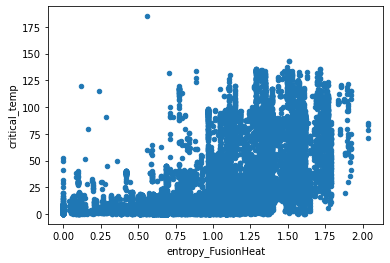

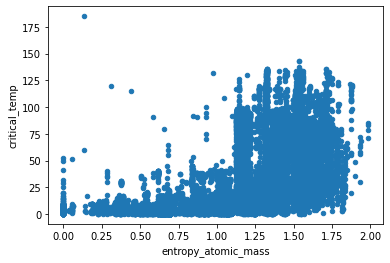

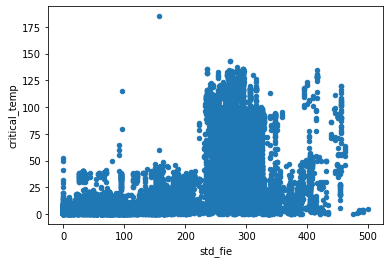

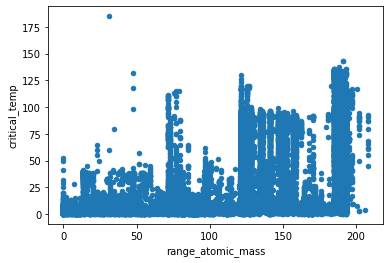

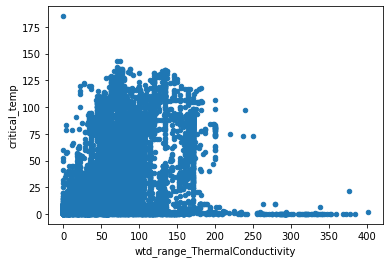

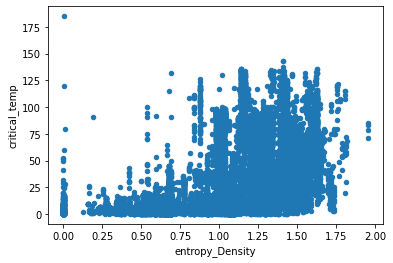

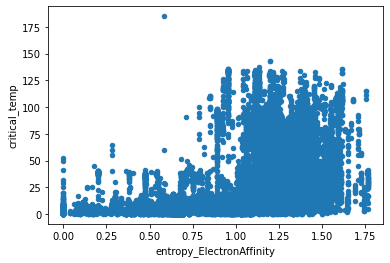

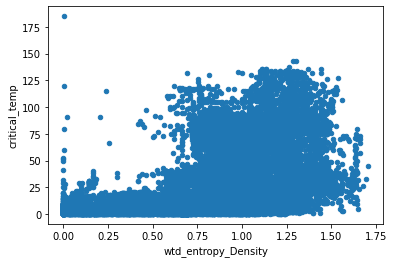

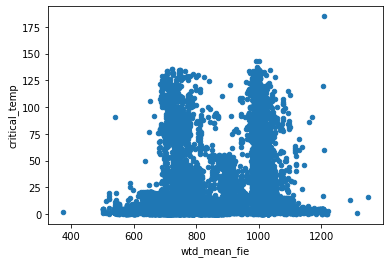

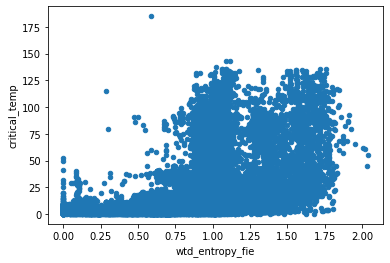

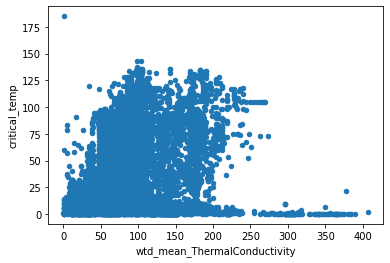

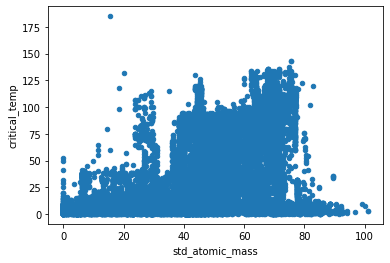

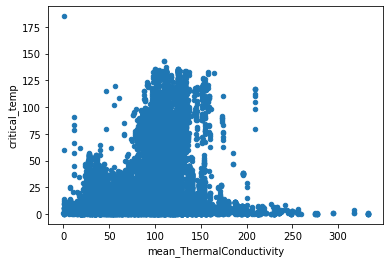

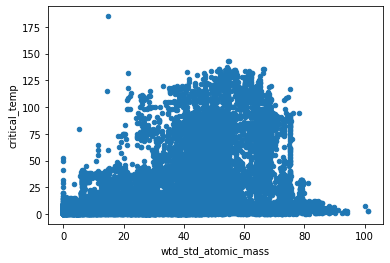

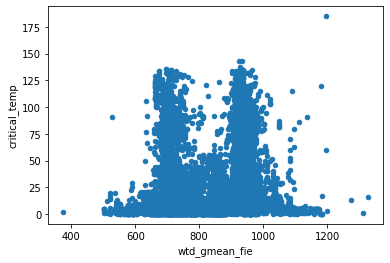

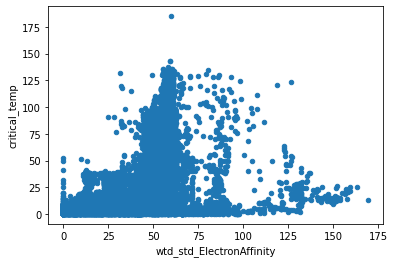

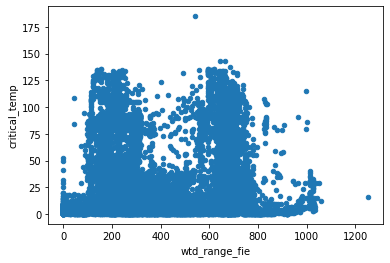

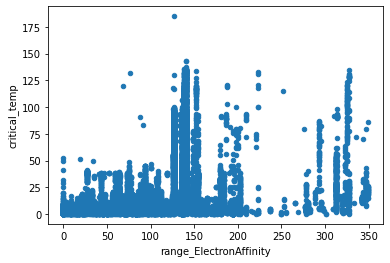

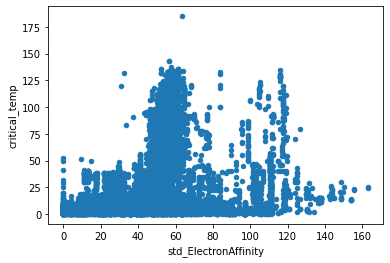

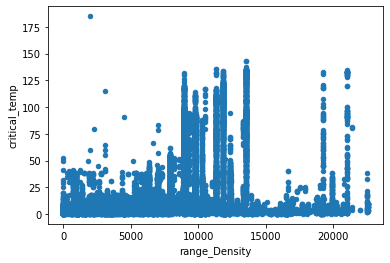

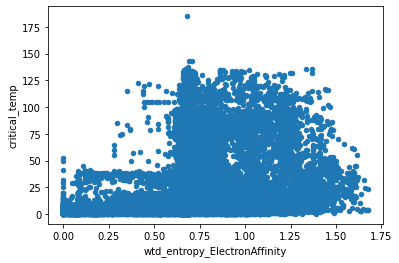

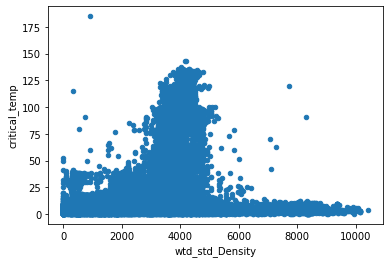

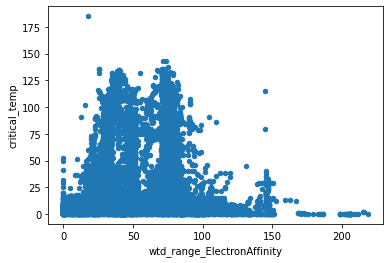

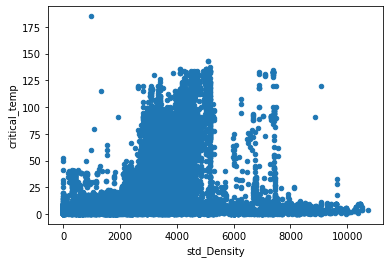

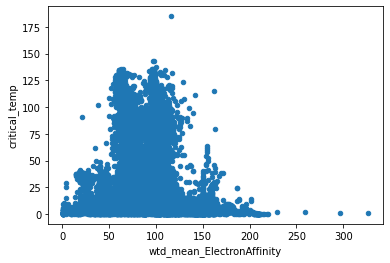

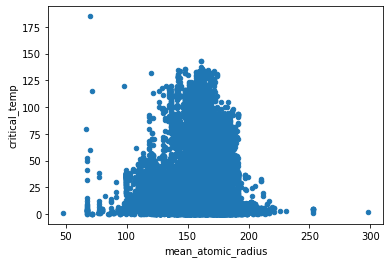

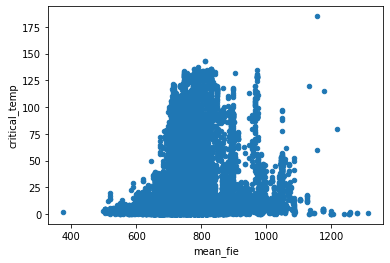

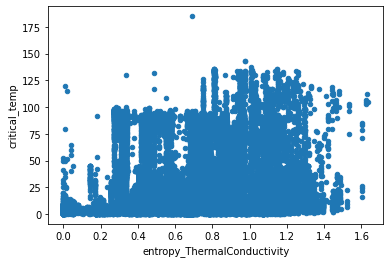

In [13]:
features_corr = ['wtd_std_ThermalConductivity','range_ThermalConductivity','range_atomic_radius',
                  'std_ThermalConductivity', 'wtd_entropy_atomic_mass','wtd_entropy_atomic_radius',
                  'number_of_elements','range_fie', 'wtd_std_atomic_radius','entropy_Valence',   
                 'wtd_entropy_Valence','wtd_std_fie', 'entropy_fie' ,'wtd_entropy_FusionHeat',     
                 'std_atomic_radius' , 'entropy_atomic_radius','entropy_FusionHeat','entropy_atomic_mass' ,         
                  'std_fie', 'range_atomic_mass','wtd_range_ThermalConductivity','entropy_Density',              
                    'entropy_ElectronAffinity','wtd_entropy_Density','wtd_mean_fie','wtd_entropy_fie',              
                    'wtd_mean_ThermalConductivity','std_atomic_mass', 'mean_ThermalConductivity',     
                    'wtd_std_atomic_mass', 'wtd_gmean_fie', 'wtd_std_ElectronAffinity', 'wtd_range_fie',                
                    'range_ElectronAffinity','std_ElectronAffinity','range_Density','wtd_entropy_ElectronAffinity', 
                    'wtd_std_Density', 'wtd_range_ElectronAffinity','std_Density', 'wtd_mean_ElectronAffinity',         
                    'mean_atomic_radius','mean_fie','entropy_ThermalConductivity']
for i in features_corr:
    data.plot.scatter(x=i, y='critical_temp')

**Conclusion**
1. It can be seen that there is no noise in the dataset based on histogram and dispersion not high
2. In correlation it can be seen that those columns has correlation to a target 'critical_temp'

    2.1 **wtd_std_ThermalConductivity**        0.721271    **-> Highest**
    
    2.2 **range_ThermalConductivity**           0.687654
    
    2.3 **range_atomic_radius**                 0.653759
    
    2.4 **std_ThermalConductivity**             0.653632
    
    2.5 **wtd_entropy_atomic_mass**             0.626930
    
    2.6 **wtd_entropy_atomic_radius**           0.603494
    
    2.7 **number_of_elements**                  0.601069
    
    2.8 **range_fie**                           0.600790
    
    2.9 **wtd_std_atomic_radius**               0.599199
    
    2.10 **entropy_Valence**                    0.598591
    
    2.11 **wtd_entropy_Valence**                0.589664
    
    2.12 **wtd_std_fie**                        0.582013
    
    2.13 **entropy_fie**                       0.567817
    
    2.14 **wtd_entropy_FusionHeat**             0.563244
    
    2.15 **std_atomic_radius**                  0.559629
    
    2.16 **entropy_atomic_radius**             0.558937
    
    2.17 **entropy_FusionHeat**                 0.552709
    
    2.18 **entropy_atomic_mass**                0.543619
    
    2.19 **std_fie**                         0.541804
    
    2.20 **range_atomic_mass**                  0.491970
    
    2.21 **wtd_range_ThermalConductivity**      0.469572
    
    2.22 **entropy_Density**                    0.457169
    
    2.23 **entropy_ElectronAffinity**           0.437207
    
    2.24 **wtd_entropy_Density**                0.400190
    
    2.25 **wtd_mean_fie**                       0.398796
    
    2.26 **wtd_entropy_fie**                    0.388359
    
    2.27 **wtd_mean_ThermalConductivity**       0.379336
    
    2.28 **std_atomic_mass**                    0.378766
    
    2.29 **mean_ThermalConductivity**           0.375813
    
    2.30 **wtd_std_atomic_mass**                0.359306
    
    2.31 **wtd_gmean_fie**                      0.343747
    
    2.32 **wtd_std_ElectronAffinity**           0.315147
    
    2.33 **wtd_range_fie**                      0.300482
    
    2.34 **range_ElectronAffinity**             0.279705
    
    2.35 **std_ElectronAffinity**               0.262103
    
    2.36 **range_Density**                      0.260536
    
    2.37 **wtd_entropy_ElectronAffinity**       0.237648
    
    2.38 **wtd_std_Density**                    0.207663
    
    2.39 **wtd_range_ElectronAffinity**         0.185348
    
    2.40 **std_Density**                        0.115243
    
    2.41 **wtd_mean_ElectronAffinity**          0.111516
    
    2.42 **mean_atomic_radius**                 0.105273
    
    2.43 **mean_fie**                           0.102268
    
    2.44 **entropy_ThermalConductivity**        0.085862    **->Lowest**
    

# Create a Test Set USING (stratified sampling method) 

## Making five bins for the attribute 'wtd_gmean_Valence'

In [14]:
data.describe()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  std_atomic_mass  wtd_std_atomic_mass      mean_fie  wtd_mean_fie     gmean_fie  wtd_gmean_fie   entropy_fie  wtd_entropy_fie     range_fie  wtd_range_fie       std_fie   wtd_std_fie  mean_atomic_radius  wtd_mean_atomic_radius  gmean_atomic_radius  wtd_gmean_atomic_radius  entropy_atomic_radius  wtd_entropy_atomic_radius  range_atomic_radius  wtd_range_atomic_radius  std_atomic_radius  wtd_std_atomic_radius  mean_Density  wtd_mean_Density  gmean_Density  wtd_gmean_Density  entropy_Density  wtd_entropy_Density  range_Density  wtd_range_Density   std_Density  wtd_std_Density  mean_ElectronAffinity  wtd_mean_ElectronAffinity  gmean_ElectronAffinity  wtd_gmean_ElectronAffinity  entropy_ElectronAffinity  wtd_entropy_ElectronAffinity  range_ElectronAffinity  wtd_range_ElectronAffinity  \
count        21197.000000      21197.000000          21197.000000       21197.000000           21197.000000         21197.000000             21197.000000       21197.000000           21197.000000     21197.000000         21197.000000  21197.000000  21197.000000  21197.000000   21197.000000  21197.000000     21197.000000  21197.000000   21197.000000  21197.000000  21197.000000        21197.000000            21197.000000         21197.000000             21197.000000           21197.000000               21197.000000         21197.000000             21197.000000       21197.000000           21197.000000  21197.000000      21197.000000   21197.000000       21197.000000     21197.000000         21197.000000   21197.000000       21197.000000  21197.000000     21197.000000           21197.000000               21197.000000            21197.000000                21197.000000              21197.000000                  21197.000000            21197.000000                21197.000000   
mean             4.120300         87.544201             72.945331          71.253164              58.474874             1.166782                 1.065103         115.751945              33.204053        44.436401            41.490888    769.763322    870.845514    737.547500     833.083589      1.300496         0.927436    573.413988     483.935313    216.035193    224.476880          157.968942              134.637733           144.407310               120.880069               1.269041                   1.132479           139.552012                51.290519          51.669299              52.410878   6104.949112       5259.357685    3448.167503        3104.482658         1.073272             0.856543    8673.258150        2900.587194   3418.704041      3321.751640              76.866669                  92.749248               54.307039                   72.413486                  1.071182                      0.771238              120.868857                   59.383115   
std              1.438282         29.643136             33.460789          30.990774              36.615381             0.364712                 0.401225          54.584784              26.966285        20.019732            19.973773     87.486110    143.208996     78.345068     119.722906      0.381597         0.334107    309.205105     224.068070    109.820525    127.811013           20.151776               28.777408            22.080187                35.801133               0.375109                   0.406876            67.202224                34.993536          22.876341              25.271459   2841.463086       3216.978402    3697.026215        3970.072718         0.342333             0.319808    4093.005329        2398.872994   1671.437273      1609.618632              27.695062                  32.282257               29.000902                   31.666733                  0.343299                      0.286020               58.679836                   28.598854   
min              1.000000          6.941000        

In [15]:
data['wtd_gmean_Valence-bins'] = pd.qcut(data['wtd_gmean_Valence'], 5, labels=[1,2,3,4,5])

In [16]:
data['wtd_gmean_Valence-bins'].head()

0    2
1    2
2    2
3    2
4    2
Name: wtd_gmean_Valence-bins, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [17]:
#new DF to display min and max values of each bin
new_df = pd.DataFrame(columns=['bin','value'])
for i in data['wtd_gmean_Valence-bins'].unique().sort_values():
    min_v = float(data[data['wtd_gmean_Valence-bins']==i][['wtd_gmean_Valence']].min())
    max_v = float(data[data['wtd_gmean_Valence-bins']==i][['wtd_gmean_Valence']].max())
    df2 = pd.DataFrame({'bin': [str(i)],
                    'value' : [min_v]})
                       
    df3 = pd.DataFrame({'bin': [str(i)],
                    'value' : [max_v]})
    new_df = pd.concat([new_df, df2], ignore_index = True, axis = 0)
    new_df = pd.concat([new_df, df3], ignore_index = True, axis = 0)

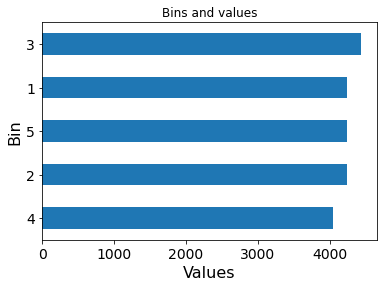

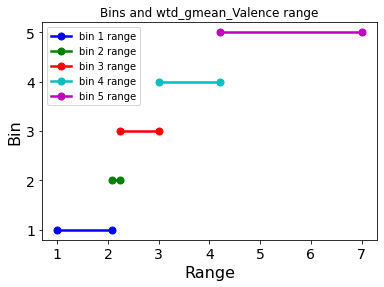

In [18]:
#display 1.Total Values for each bin
data['wtd_gmean_Valence-bins'].value_counts().sort_values().plot(kind='barh')
#Add extra infromation to plot
plt.title("Bins and values")
plt.ylabel("Bin", fontsize=16)  
plt.xlabel("Values", fontsize=16)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
plt.show()

#display 2.Range for each bin
plt.plot(new_df[new_df['bin']=="1"]['value'],
         new_df[new_df['bin']=="1"]['bin'], "-o",color='b',
         linewidth=2.5,markersize=7, label='bin 1 range')
plt.plot(new_df[new_df['bin']=="2"]['value'],
         new_df[new_df['bin']=="2"]['bin'], "-o",color='g',
         linewidth=2.5,markersize=7, label='bin 2 range')
plt.plot(new_df[new_df['bin']=="3"]['value'],
         new_df[new_df['bin']=="3"]['bin'], "-o",color='r',
         linewidth=2.5,markersize=7, label='bin 3 range')
plt.plot(new_df[new_df['bin']=="4"]['value'],
         new_df[new_df['bin']=="4"]['bin'], "-o",color='c',
         linewidth=2.5,markersize=7, label='bin 4 range')
plt.plot(new_df[new_df['bin']=="5"]['value'],
         new_df[new_df['bin']=="5"]['bin'], "-o",color='m',
         linewidth=2.5,markersize=7, label='bin 5 range')
#Add extra infromation to plot
plt.xlabel("Range",fontsize=16)
plt.ylabel("Bin",fontsize=16)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
plt.title("Bins and wtd_gmean_Valence range")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [19]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#split our dataset on test and training
for train_index, test_index in split.split(data, data["wtd_gmean_Valence-bins"]):   
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    #see diffrenece
    print('test set:')
    print(X_test["wtd_gmean_Valence-bins"].value_counts() / len(X_test))
    print(f'Original data:')
    print(data["wtd_gmean_Valence-bins"].value_counts() / len(data))

test set:
3    0.208962
1    0.200236
5    0.200000
2    0.199764
4    0.191038
Name: wtd_gmean_Valence-bins, dtype: float64
Original data:
3    0.208992
1    0.200123
5    0.200028
2    0.199887
4    0.190970
Name: wtd_gmean_Valence-bins, dtype: float64


In [20]:
print('Test Set size: ', X_test.shape[0])
print('Train Set size: ',X_train.shape[0])

Test Set size:  4240
Train Set size:  16957


In [21]:
for set_ in (X_train, X_test):
    set_.drop("wtd_gmean_Valence-bins", axis=1, inplace=True)

<ipython-input-21-cf0b2d5b8774>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("wtd_gmean_Valence-bins", axis=1, inplace=True)
<ipython-input-21-cf0b2d5b8774>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("wtd_gmean_Valence-bins", axis=1, inplace=True)


**Test and Train sets were splitted good**

# Prepare the Data for Machine Learning Algorithms

In [22]:
features_train = X_train.drop("critical_temp", axis=1) # drop target for training set
target_train = X_train["critical_temp"] #set only target

features_test = X_test.drop("critical_temp", axis=1) # drop target for training set
target_test = X_test["critical_temp"] #set only target

In [23]:
print(features_test.shape[0])
print(features_train.shape[0])

4240
16957


# Machine Learning Algorithms

firstly, we will do the **Decision Tree** and ***Random Forest** and **Gradient boosted regression trees** as they are not sensitive to scaling

# Tree Models Without Tuning

In [24]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### Decision Tree

**DT** - one of the popular model for classification and regression. Our DT will search over all possbile test and will find the most informative about target variable. One of the important parametrs are **max_deph**, **max_leaf_nodes** or **min samples_leaf** - will lead to avoid the overfiting. In this example we wont modify any parametrs and let them use by default but in Tunning stage we will use them.

In [25]:
rmse_list = []
mse_list = []
predictions_list = []
score_list_train = []
target = []

d_tree = DecisionTreeRegressor(random_state=42).fit(features_train,target_train)
d_predicted_train = d_tree.predict(features_train)
#Perfomance
#MSE
mse =  np.square(np.subtract(target_train,d_predicted_train)).mean()
mse_list.append(mse)
#RMSE
rmse = np.sqrt(np.mean((target_train-d_predicted_train)**2))
rmse_list.append(rmse)
#Mean of Prediction
predictions_list.append(d_predicted_train.mean())
#Score List of traina and test
score_list_train.append(d_tree.score(features_train,target_train))
#Target Mean
target.append(data['critical_temp'].mean())

In [26]:
print(f'MSE: {mse} ; RMSE: {rmse} ; Score: {d_tree.score(features_train,target_train)}')

MSE: 17.038625563668422 ; RMSE: 4.127787005608262 ; Score: 0.9855460304606493


In [27]:
scores = cross_val_score(d_tree, features_train, target_train,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [13.04262891 12.47386718 12.56749646 12.6694883  12.33634898]
Mean: 12.617965965990651
Standard deviation: 0.23900331341446235


Cross validation were tested with different fold cross validation number and the best mean were 12.24 with cv=10, however with 5 fold cv number it = 12.63. I would use 5 as it is not big difference and thus we can reduce computational cost.

### Random Forest

RF - a collection of DT, where each tree is a little bit different from the other. Each tree split performs randomly and at the end, it picks the best Tree with the best score, for example for our model (Regression) we can average these results to get our final prediction.

the most critical parameter in Random Forest is **max_features** as it controls the selected number of features.

The best Parametres with we are going to  play might to increase the performance of our Model are:
1. n_estimators 
2. max_depth
3. max_features
4. min_samples_split
5. min_samples_leaf 

In [28]:
f_tree = RandomForestRegressor(random_state=42).fit(features_train,target_train)
f_predicted_train = f_tree.predict(features_train)
#Perfomance
#MSE
mse = np.square(np.subtract(target_train,f_predicted_train)).mean()
mse_list.append(mse)
#RMSE
rmse = np.sqrt(np.mean((target_train-f_predicted_train)**2))
rmse_list.append(rmse)
#Mean of Prediction
predictions_list.append(f_predicted_train.mean())
#Score List of traina and test
score_list_train.append(f_tree.score(features_train,target_train))
#Target Mean
target.append(data['critical_temp'].mean())

In [29]:
print('RANDOM FOREST')
print(f'MSE: {mse} ; RMSE: {rmse} ; Score: {f_tree.score(features_train,target_train)}')

RANDOM FOREST
MSE: 25.60673551804033 ; RMSE: 5.060309824313165 ; Score: 0.9782776507531703


In [30]:
#Cross validation cv = 5
scores = cross_val_score(f_tree, features_train, target_train,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [10.20506097  9.45854373  9.47253334 10.00962034  9.57210917]
Mean: 9.743573510700354
Standard deviation: 0.30589421674518463


Cross validation were tested with different fold cross validation number and the best mean were 9.58 with cv=10, however with 5 fold cv number it = 9.72. I would use 5 as it is not big difference and thus we can reduce computational cost.

In [31]:
#Sum up of our running models
scorelist = pd.DataFrame(
    data=[mse_list,rmse_list, score_list_train, predictions_list, target], 
    index=['MSE','RMSE','SCORE-TRAIN','PREDICTED MEAN', 'TARGET MEAN'], 
    columns=['Desicion Tree','Random Forest'])
scorelist

Desicion Tree  Random Forest
MSE                 17.038626      25.606736
RMSE                 4.127787       5.060310
SCORE-TRAIN          0.985546       0.978278
PREDICTED MEAN      34.494743      34.490517
TARGET MEAN         34.494532      34.494532

# Tree Models With Tuning

### Decision Tree

In [32]:
rmse_list = []
mse_list = []
predictions_list = []
score_list_train = []
score_list_test = []
target = []

In [33]:
# here we use cv = 5 as it shows that our mean in cross validation around 12.63.
# We prefer using cv = 5 as it does not have big difference in mean and reduce compitational cost.
params = {'max_leaf_nodes': [80,90,100,120], 'min_samples_split': [3,6,9], 'max_depth':[5,6,10]}
grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), params, verbose=1, cv=5)
grid_search_dt.fit(features_train, target_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [5, 6, 10],
                         'max_leaf_nodes': [80, 90, 100, 120],
                         'min_samples_split': [3, 6, 9]},
             verbose=1)

In [34]:
grid_search_dt.best_params_

{'max_depth': 10, 'max_leaf_nodes': 120, 'min_samples_split': 3}

In [35]:
grid_search_dt.best_estimator_

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=120, min_samples_split=3,
                      random_state=42)

In [36]:
d_tree_tuned = grid_search_dt.best_estimator_
d_tuned_predicted_train = d_tree.predict(features_train)
#Perfomance
#RMSE
mse =  np.square(np.subtract(target_train,d_tuned_predicted_train)).mean()
mse_list.append(mse)
rmse = np.sqrt(np.mean((target_train-d_tuned_predicted_train)**2))
rmse_list.append(rmse)
#Mean of Prediction
predictions_list.append(d_tuned_predicted_train.mean())
#Score List of traina and test
score_list_train.append(d_tree_tuned.score(features_train,target_train))
#Target Mean
target.append(data['critical_temp'].mean())

### Random Forest

In [37]:
param_grid = [
    {'n_estimators': [200,300], 'max_features': [5,10] ,'max_depth':[5,None],
    'min_samples_split':[2], 'min_samples_leaf':[2]},
    {'bootstrap': [False], 'n_estimators': [200,300], 'max_features': [5,10],
    'max_depth':[5,6,None],'min_samples_split':[2], 'min_samples_leaf':[2]},
  ] 

forest_reg = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_rf.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_depth': [5, None], 'max_features': [5, 10],
                          'min_samples_leaf': [2], 'min_samples_split': [2],
                          'n_estimators': [200, 300]},
                         {'bootstrap': [False], 'max_depth': [5, 6, None],
                          'max_features': [5, 10], 'min_samples_leaf': [2],
                          'min_samples_split': [2],
                          'n_estimators': [200, 300]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [38]:
grid_search_rf.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [39]:
grid_search_rf.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=10, min_samples_leaf=2,
                      n_estimators=300, random_state=42)

In [40]:
rf_tree_tuned = grid_search_rf.best_estimator_
rf_tuned_predicted_train = rf_tree_tuned.predict(features_train)
#Perfomance
#RMSE
mse =  np.square(np.subtract(target_train,rf_tuned_predicted_train)).mean()
mse_list.append(mse)
rmse = np.sqrt(np.mean((target_train-rf_tuned_predicted_train)**2))
rmse_list.append(rmse)
#Mean of Prediction
predictions_list.append(rf_tuned_predicted_train.mean())
#Score List of traina and test
score_list_train.append(rf_tree_tuned.score(features_train,target_train))
#Target Mean
target.append(data['critical_temp'].mean())

### Gradient Boosting 

In [41]:
scorelist_tuned = pd.DataFrame(
    data=[mse_list,rmse_list, score_list_train, predictions_list, target], 
    index=['MSE','RMSE','SCORE-TRAIN','PREDICTED MEAN','TARGET MEAN'], 
    columns=['Desicion Tree Tunned','Random Forest Tunned'])
scorelist_tuned

Desicion Tree Tunned  Random Forest Tunned
MSE                        17.038626             20.053828
RMSE                        4.127787              4.478150
SCORE-TRAIN                 0.884829              0.982988
PREDICTED MEAN             34.494743             34.494743
TARGET MEAN                34.494532             34.494532

## Comparison of 2 table where 1 table represent ML models without tunning and 2nd table  ML models after tunning

**ML MODEL BEFORE TUNNING**

In [42]:
scorelist

Desicion Tree  Random Forest
MSE                 17.038626      25.606736
RMSE                 4.127787       5.060310
SCORE-TRAIN          0.985546       0.978278
PREDICTED MEAN      34.494743      34.490517
TARGET MEAN         34.494532      34.494532

It can be seen that the best model is Decision Tree has **the lowest RMSE and MSE 4.1** and **17** respectively. **The Score of the Train 98.5%**. While Random Forest showed as well good result with **RMSE 5** and **MSE 25** and **Train score 97.8%**

**ML MODEL AFTER TUNNING**

In [43]:
scorelist_tuned

Desicion Tree Tunned  Random Forest Tunned
MSE                        17.038626             20.053828
RMSE                        4.127787              4.478150
SCORE-TRAIN                 0.884829              0.982988
PREDICTED MEAN             34.494743             34.494743
TARGET MEAN                34.494532             34.494532

It can be seen that the best model is still Desicion Tree as it has **the lowest RMSE and MSE 4.1** and **17** respectively. However the has decressed but it is not an indicator to bad perfomance of the model **Train SCORE 88.2%.**

Random Forest improved as well and got same Predicted mean as DT. The rest indicators were slightly improved RMSE and MSE in Random Forest


**Conclusion**

It can be seen that all Tuned ML models have been improved in everything. The best Model was chosen Random Forest Tuned

# K-Neighbors 

### Scaling Data


In [44]:
scaler = StandardScaler()
scaler.fit(features_train)
feature_train_scaled = scaler.transform(features_train)
feature_test_scaled = scaler.transform(features_test)

In [45]:
rmse_list = []
mse_list = []
predictions_list = []
score_list_train = []
target = []

## K-Neighbors

In [46]:
k_reg = KNeighborsRegressor().fit(feature_train_scaled, target_train)
k_reg_predicted_train = k_reg.predict(feature_train_scaled)
#Perfomance
#MSE
mse = np.square(np.subtract(target_train,k_reg_predicted_train)).mean()
mse_list.append(mse)
#RMSE
rmse = np.sqrt(np.mean((target_train-k_reg_predicted_train)**2))
rmse_list.append(rmse)
#Mean of Prediction
predictions_list.append(k_reg_predicted_train.mean())
#Score List of traina and test
score_list_train.append(k_reg.score(feature_train_scaled,target_train))
#Target Mean
target.append(data['critical_temp'].mean())

In [47]:
print('K-Neighbors')
print(f'MSE: {mse} ; RMSE: {rmse} ; Score: {score_list_train}')

K-Neighbors
MSE: 76.60314095352199 ; RMSE: 8.75232203209651 ; Score: [0.9350170903267144]


In [48]:
#Cross validation cv = 10
scores = cross_val_score(k_reg, features_train, target_train,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [12.94325067 12.28331413 12.66173701 12.86687279 12.3158831 ]
Mean: 12.614211538981191
Standard deviation: 0.27307730533269287


In [49]:
scorelist_lrs = pd.DataFrame(
    data=[mse_list,rmse_list, score_list_train, predictions_list, target], 
    index=['MSE','RMSE','SCORE-TRAIN','PREDICTED MEAN','TARGET MEAN'], 
    columns=['K-Neighbors'])#'Random Forest','Gradient Boosting'])
scorelist_lrs

K-Neighbors
MSE               76.603141
RMSE               8.752322
SCORE-TRAIN        0.935017
PREDICTED MEAN    34.648658
TARGET MEAN       34.494532

# Tunning our K-Neighbors  

In [50]:
rmse_list = []
mse_list = []
predictions_list = []
score_list_train = []
score_list_test = []
target = []

## K-Neighbors Tunning

In [51]:
param_grid = {'n_neighbors': [1,2,3,9,10,15,18,20],
              'leaf_size':[1,5,10,30,80,100]}

KnR_t = KNeighborsRegressor()

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_KnR = GridSearchCV(KnR_t, param_grid, cv=5,
                               n_jobs=-1)
grid_search_KnR.fit(feature_train_scaled, target_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'leaf_size': [1, 5, 10, 30, 80, 100],
                         'n_neighbors': [1, 2, 3, 9, 10, 15, 18, 20]})

In [52]:
grid_search_KnR.best_params_

{'leaf_size': 1, 'n_neighbors': 2}

In [53]:
grid_search_KnR.best_estimator_

KNeighborsRegressor(leaf_size=1, n_neighbors=2)

In [54]:
Knr_tuned = grid_search_KnR.best_estimator_
Knr_tuned_predicted_train = Knr_tuned.predict(feature_train_scaled)
#Perfomance
#MSE
mse =  np.square(np.subtract(target_train,Knr_tuned_predicted_train)).mean()
mse_list.append(mse)
#RMSE
rmse = np.sqrt(np.mean((target_train-Knr_tuned_predicted_train)**2))
rmse_list.append(rmse)
#Mean of Prediction
predictions_list.append(Knr_tuned_predicted_train.mean())
#Score List of traina and test
score_list_train.append(Knr_tuned.score(feature_train_scaled,target_train))
#Target Mean
target.append(data['critical_temp'].mean())

In [55]:
scorelist_lrs_tunned = pd.DataFrame(
    data=[mse_list,rmse_list, score_list_train, predictions_list, target], 
    index=['MSE','RMSE','SCORE-TRAIN','PREDICTED MEAN','TARGET MEAN'], 
    columns=['K-Neighbors Tunned'])
scorelist_lrs_tunned

K-Neighbors Tunned
MSE                      42.938160
RMSE                      6.552722
SCORE-TRAIN               0.963575
PREDICTED MEAN           34.505391
TARGET MEAN              34.494532

## Comparison of 2 table where 1 table represent ML models without tunning and 2nd table  ML models after tunning

**ML MODEL WITHOUT TUNNING**

In [56]:
scorelist_lrs

K-Neighbors
MSE               76.603141
RMSE               8.752322
SCORE-TRAIN        0.935017
PREDICTED MEAN    34.648658
TARGET MEAN       34.494532

**ML MODEL WITH TUNNING**

In [57]:
scorelist_lrs_tunned

K-Neighbors Tunned
MSE                      42.938160
RMSE                      6.552722
SCORE-TRAIN               0.963575
PREDICTED MEAN           34.505391
TARGET MEAN              34.494532

Overall It can be seen that K-Neighbors has been improved with tunning  **RMSE and MSE 6.5** and **42** respectively. it has got almost closer to mean to Target with a difference **0.02**. Tunning improved perfomance of the ML model, but still it is not better than DT and Random Forest

### JOIN ALL TUNNED  MODELS

In [58]:
#Tunned
AllModels_tunned = scorelist_lrs_tunned.join(scorelist_tuned)
#not Tunned
AllModels_NotTunned = scorelist_lrs.join(scorelist)

### ML MODELS BEFORE TUNNING

In [59]:
AllModels_NotTunned

K-Neighbors  Desicion Tree  Random Forest
MSE               76.603141      17.038626      25.606736
RMSE               8.752322       4.127787       5.060310
SCORE-TRAIN        0.935017       0.985546       0.978278
PREDICTED MEAN    34.648658      34.494743      34.490517
TARGET MEAN       34.494532      34.494532      34.494532

### ML MODELS AFTER TUNING

In [60]:
AllModels_tunned

K-Neighbors Tunned  Desicion Tree Tunned  Random Forest Tunned
MSE                      42.938160             17.038626             20.053828
RMSE                      6.552722              4.127787              4.478150
SCORE-TRAIN               0.963575              0.884829              0.982988
PREDICTED MEAN           34.505391             34.494743             34.494743
TARGET MEAN              34.494532             34.494532             34.494532

# Conclusion Among all Used models

<div class="alert alert-info">

<p>
Among all used Models It can be seen that all ML models have been improved in everything after tunning. However, The best Model according to RMSE, MSE and Mean are DT and Random Forest.
</p>
<p>
Since we can not use 2 models I would pick and use Random Forest Model on the test and will see the output
</p>
</div>

### RUNNING RANDOM FOREST ON TEST SET

In [61]:
rmse_list = []
mse_list = []
predictions_list = []
score_list_test = []
target = []

final_model = grid_search_rf.best_estimator_
final_predictions = final_model.predict(features_test)
#MSE
mse = np.square(np.subtract(target_test,final_predictions)).mean()
mse_list.append(mse)
#RMSE
rmse = np.sqrt(np.mean((target_test-final_predictions)**2))
rmse_list.append(rmse)
#Mean of Prediction
predictions_list.append(final_predictions.mean())
#Score List of traina and test
score_list_test.append(final_model.score(features_test,target_test))
#Target Mean
target.append(data['critical_temp'].mean())

In [62]:
final_model = pd.DataFrame(
    data=[mse_list,rmse_list, score_list_test, predictions_list, target], 
    index=['MSE','RMSE','SCORE-TEST','PREDICTED MEAN','TARGET MEAN'], 
    columns=['Random Forest'])
final_model

Random Forest
MSE                 81.427549
RMSE                 9.023721
SCORE-TEST           0.929733
PREDICTED MEAN      34.454650
TARGET MEAN         34.494532

In [63]:
#First 5 predicted critical temprature 
print(f'1st 5 predicted values: {final_predictions[:5]}')
#First 5 original values
print(f'1st 5 original values: {list(target_test[:5])}')

1st 5 predicted values: [  3.0417869    8.51631783   3.36019131  69.88383333 107.27788333]
1st 5 original values: [4.0, 8.04, 3.2, 72.0, 109.0]


### Conclusion

Random Forest showed very good perfomance on test set. and I am sure that DT would probably show the similar result